<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_3051-3100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [668]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [669]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

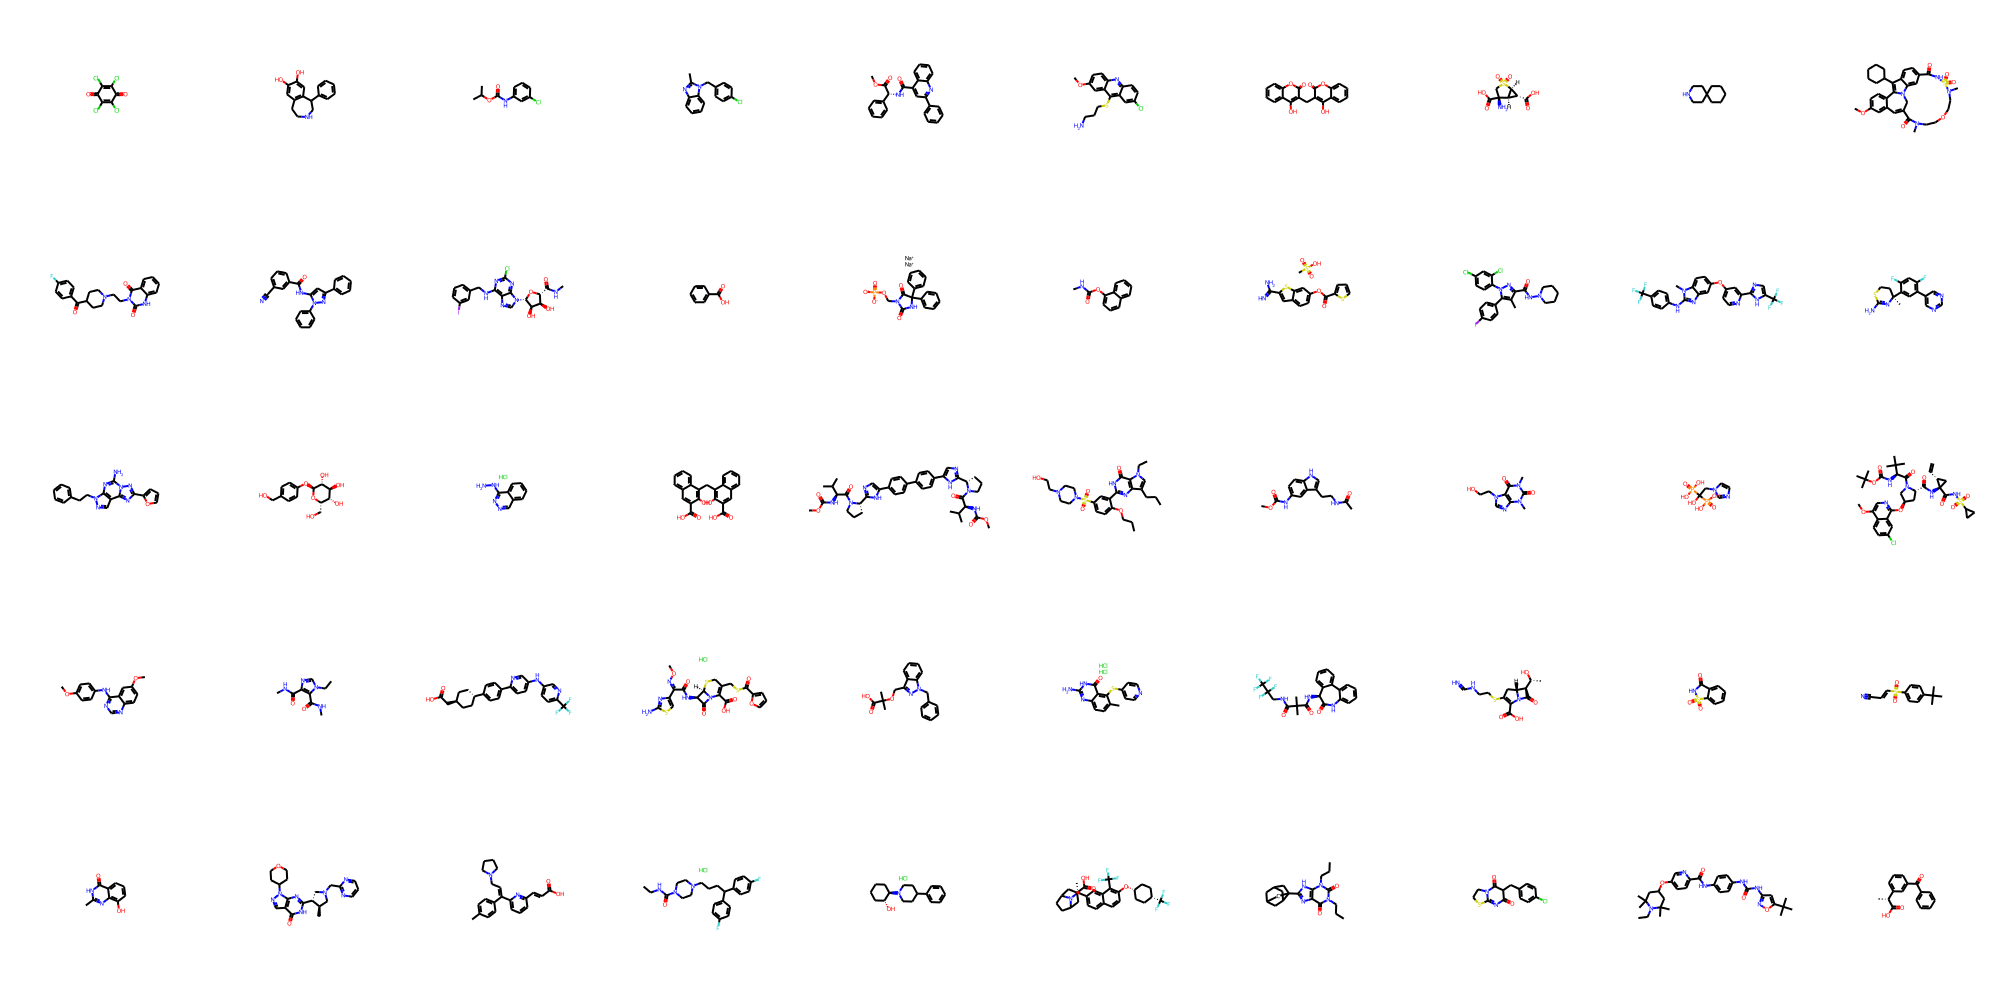

In [670]:
smiles_list = [

'O=C1C(Cl)=C(Cl)C(=O)C(Cl)=C1Cl',
'Oc1cc2c(cc1O)C(c1ccccc1)CNCC2',
'CC(C)OC(=O)Nc1cccc(Cl)c1',
'Cc1nc2ccccc2n1Cc1ccc(Cl)cc1',
'COC(=O)[C@H](NC(=O)c1cc(-c2ccccc2)nc2ccccc12)c1ccccc1',
'COc1ccc2nc3ccc(Cl)cc3c(SCCCN)c2c1',
'O=c1oc2ccccc2c(O)c1Cc1c(O)c2ccccc2oc1=O',
'N[C@@]1(C(=O)O)CS(=O)(=O)[C@H]2[C@H](C(=O)O)[C@H]21',
'C1CCC2(CC1)CCNCC2',
'COc1ccc2c(c1)C=C1Cn3c-2c(C2CCCCC2)c2ccc(cc23)C(=O)NS(=O)(=O)N(C)CCOCCN(C)C1=O',
'O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=O)CC1',
'N#Cc1cccc(C(=O)Nc2cc(-c3ccccc3)nn2-c2ccccc2)c1',
'CNC(=O)[C@H]1O[C@@H](n2cnc3c(NCc4cccc(I)c4)nc(Cl)nc32)[C@H](O)[C@@H]1O',
'O=C(O)c1ccccc1',
'O=C1NC(c2ccccc2)(c2ccccc2)C(=O)N1COP(=O)([O-])[O-].[Na+].[Na+]',
'CNC(=O)Oc1cccc2ccccc12',
'CS(=O)(=O)O.N=C(N)c1cc2ccc(OC(=O)c3cccs3)cc2s1',
'Cc1c(C(=O)NN2CCCCC2)nn(-c2ccc(Cl)cc2Cl)c1-c1ccc(I)cc1',
'Cn1c(Nc2ccc(C(F)(F)F)cc2)nc2cc(Oc3ccnc(-c4ncc(C(F)(F)F)[nH]4)c3)ccc21',
'C[C@@]1(c2cc(-c3cncnc3)c(F)cc2F)CCSC(N)=N1',
'Nc1nc2c(cnn2CCc2ccccc2)c2nc(-c3ccco3)nn12',
'OCc1ccc(O[C@@H]2O[C@@H](CO)[C@@H](O)[C@H](O)[C@H]2O)cc1',
'Cl.NNc1nncc2ccccc12',
'O=C(O)c1cc2ccccc2c(Cc2c(O)c(C(=O)O)cc3ccccc23)c1O',
'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2ccc(-c3ccc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)cc3)cc2)[nH]1)C(C)C',
'CCCOc1ccc(S(=O)(=O)N2CCN(CCO)CC2)cc1-c1nc2c(CCC)cn(CC)c2c(=O)[nH]1',
'COC(=O)Nc1ccc2[nH]cc(CCNC(C)=O)c2c1',
'Cn1c(=O)c2c(ncn2CCO)n(C)c1=O',
'O=P(O)(O)C(O)(Cn1ccnc1)P(=O)(O)O',
'C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H](Oc2ncc(OC)c3ccc(Cl)cc23)CN1C(=O)[C@@H](NC(=O)OC(C)(C)C)C(C)(C)C)C(=O)NS(=O)(=O)C1CC1',
'COc1ccc(Nc2ncnc3ccc(OC)cc23)cc1',
'CCn1cnc(C(=O)NC)c1C(=O)NC',
'O=C(O)C[C@H]1CC[C@H](c2ccc(-c3ccc(Nc4ccc(C(F)(F)F)nc4)cn3)cc2)CC1',
'CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CSC(=O)c3ccco3)CS[C@H]12)c1csc(N)n1.Cl',
'CC(C)(OCc1nn(Cc2ccccc2)c2ccccc12)C(=O)O',
'Cc1ccc2nc(N)[nH]c(=O)c2c1Sc1ccncc1.Cl.Cl',
'CC(C)(C(=O)NCC(F)(F)C(F)(F)F)C(=O)N[C@@H]1C(=O)Nc2ccccc2-c2ccccc21',
'C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(SCCNC=N)C[C@H]12',
'O=C1NS(=O)(=O)c2ccccc21',
'CC(C)(C)c1ccc(S(=O)(=O)/C=C/C#N)cc1',
'Cc1nc2c(O)cccc2c(=O)[nH]1',
'C[C@@H]1CN(Cc2ncccn2)C[C@H]1c1nc2c(cnn2C2CCOCC2)c(=O)[nH]1',
'Cc1ccc(/C(=C\CN2CCCC2)c2cccc(/C=C/C(=O)O)n2)cc1',
'CCNC(=O)N1CCN(CCCC(c2ccc(F)cc2)c2ccc(F)cc2)CC1.Cl',
'Cl.O[C@@H]1CCCC[C@H]1N1CCC(c2ccccc2)CC1',
'C[C@H](c1ccc2ccc(O[C@H]3CC[C@@H](C(F)(F)F)CC3)c(C(F)(F)F)c2c1)N1C2CCC1CC(C(=O)O)C2',
'CCCn1c(=O)c2nc(C34CC5CC(CC3C5)C4)[nH]c2n(CCC)c1=O',
'O=C1N=C2SCCN2C(=O)C1Cc1ccc(Cl)cc1',
'CCN1C(C)(C)CC(Oc2ccc(C(=O)Nc3ccc(NC(=O)Nc4cc(C(C)(C)C)on4)cc3)nc2)CC1(C)C',
'C[C@@H](C(=O)O)c1cccc(C(=O)c2ccccc2)c1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



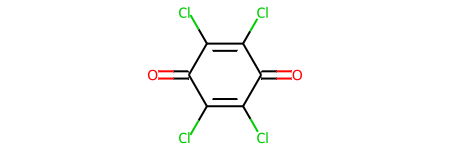

In [671]:
M1 = mol_list [0]
M1

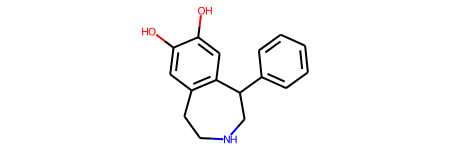

In [672]:
M2 = mol_list [1]
M2

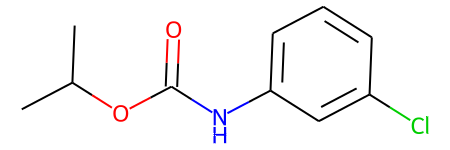

In [673]:
M3 = mol_list [2]
M3

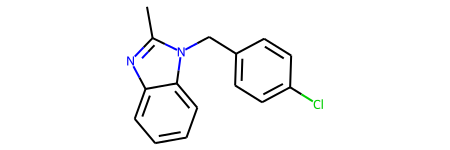

In [674]:
M4 = mol_list [3]
M4

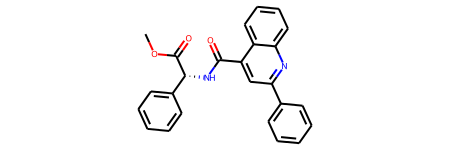

In [675]:
M5 = mol_list [4]
M5

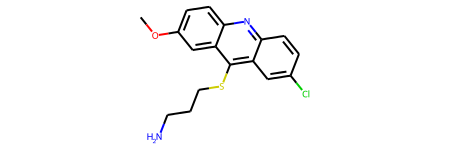

In [676]:
M6 = mol_list [5]
M6

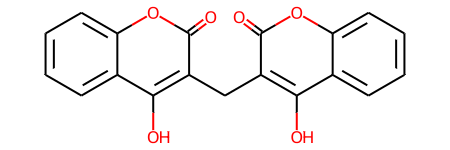

In [677]:
M7 = mol_list [6]
M7

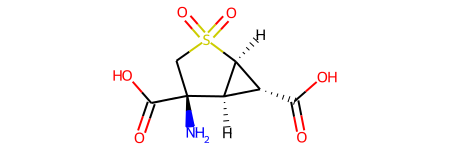

In [678]:
M8 = mol_list [7]
M8

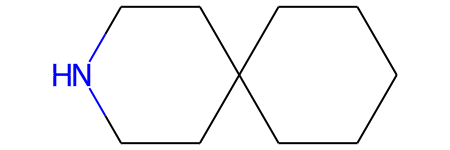

In [679]:
M9 = mol_list [8]
M9

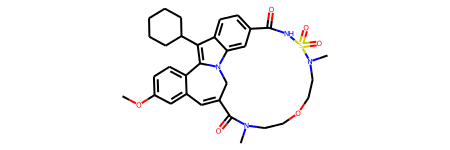

In [680]:
M10 = mol_list [9]
M10

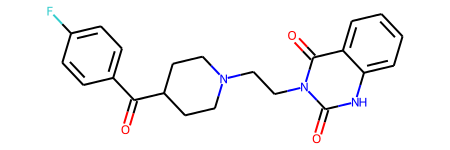

In [681]:
M11 = mol_list [10]
M11

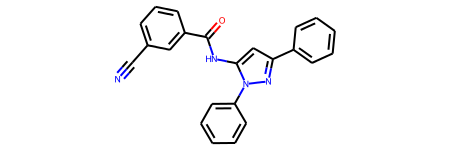

In [682]:
M12 = mol_list [11]
M12

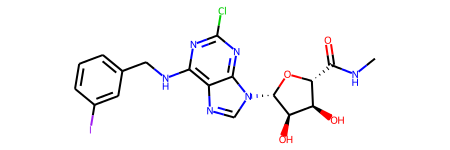

In [683]:
M13 = mol_list [12]
M13

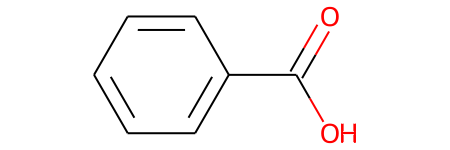

In [684]:
M14 = mol_list [13]
M14

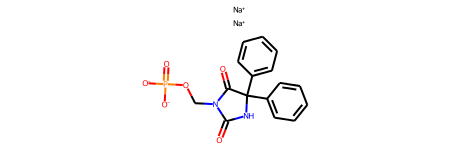

In [685]:
M15 = mol_list [14]
M15

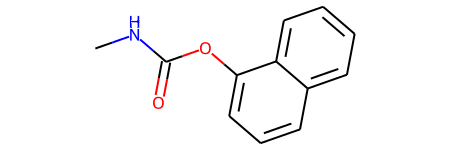

In [686]:
M16 = mol_list [15]
M16

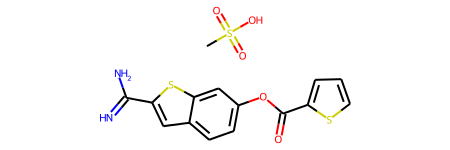

In [687]:
M17 = mol_list [16]
M17

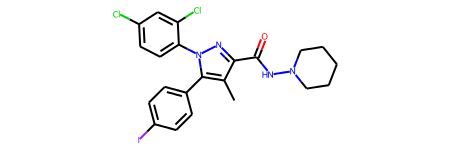

In [688]:
M18 = mol_list [17]
M18

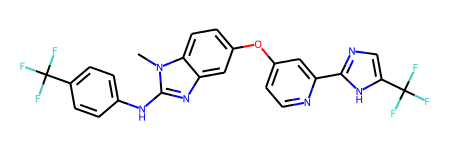

In [689]:
M19 = mol_list [18]
M19

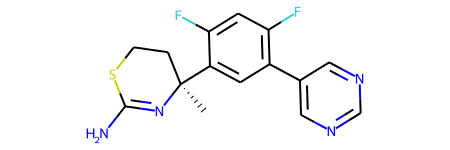

In [690]:
M20 = mol_list [19]
M20

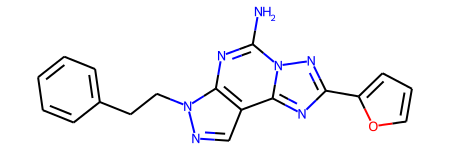

In [691]:
M21 = mol_list [20]
M21

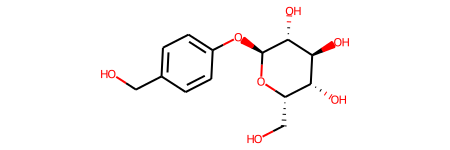

In [692]:
M22 = mol_list [21]
M22

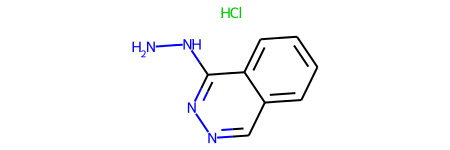

In [693]:
M23 = mol_list [22]
M23

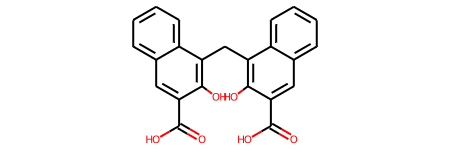

In [694]:
M24 = mol_list [23]
M24

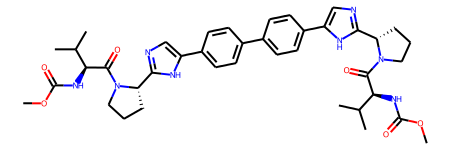

In [695]:
M25 = mol_list [24]
M25

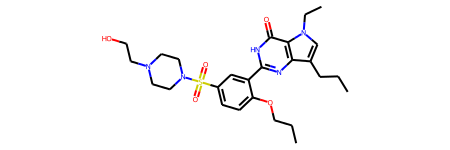

In [696]:
M26 = mol_list [25]
M26

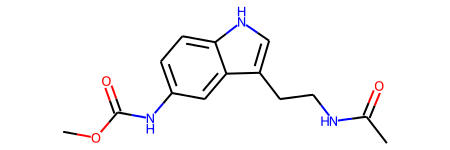

In [697]:
M27 = mol_list [26]
M27

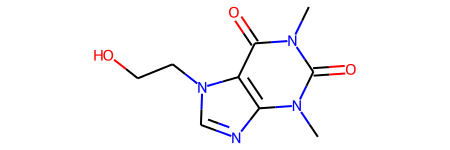

In [698]:
M28 = mol_list [27]
M28

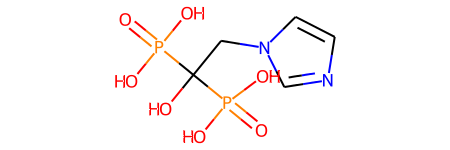

In [699]:
M29 = mol_list [28]
M29

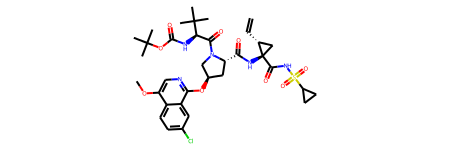

In [700]:
M30 = mol_list [29]
M30

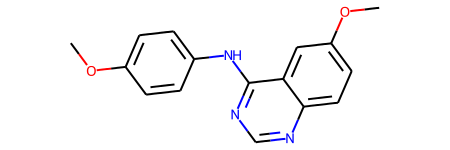

In [701]:
M31 = mol_list [30]
M31

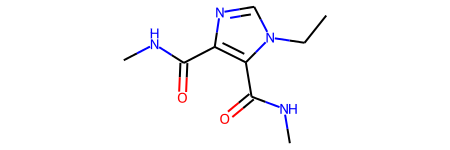

In [702]:
M32 = mol_list [31]
M32

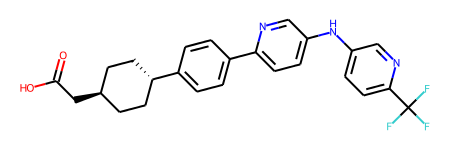

In [703]:
M33 = mol_list [32]
M33

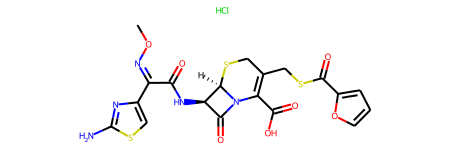

In [704]:
M34 = mol_list [33]
M34

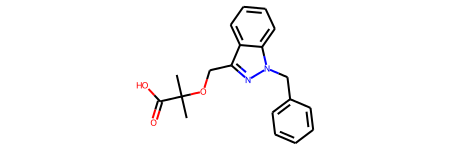

In [705]:
M35 = mol_list [34]
M35

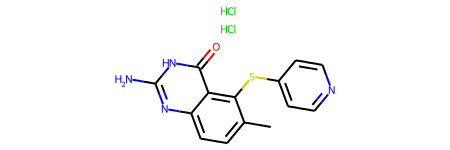

In [706]:
M36 = mol_list [35]
M36

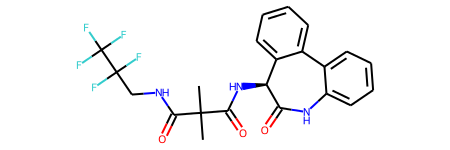

In [707]:
M37= mol_list [36]
M37

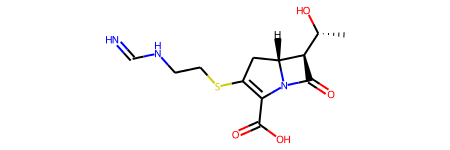

In [708]:
M38= mol_list [37]
M38

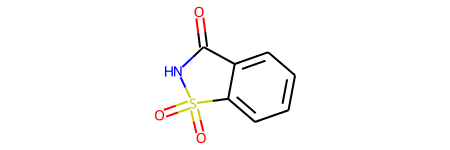

In [709]:
M39= mol_list [38]
M39

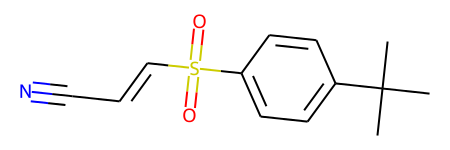

In [710]:
M40= mol_list [39]
M40

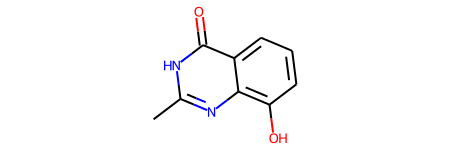

In [711]:
M41= mol_list [40]
M41

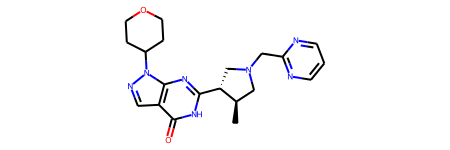

In [712]:
M42= mol_list [41]
M42

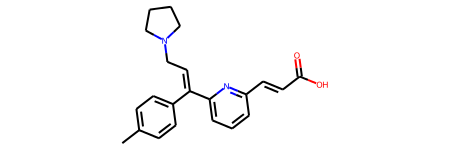

In [713]:
M43= mol_list [42]
M43

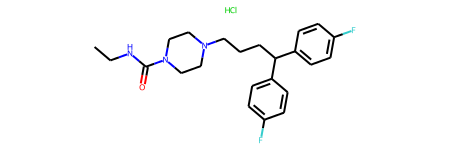

In [714]:
M44= mol_list [43]
M44

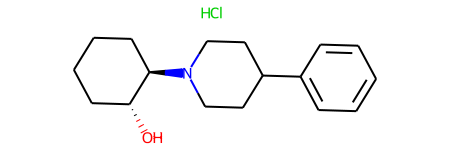

In [715]:
M45= mol_list [44]
M45

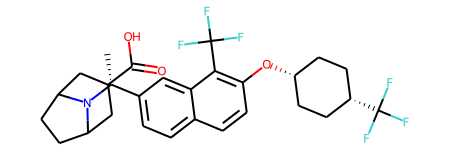

In [716]:
M46= mol_list [45]
M46

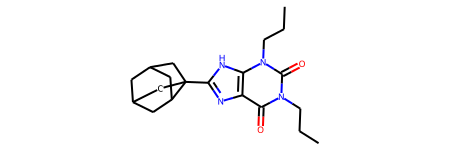

In [717]:
M47= mol_list [46]
M47

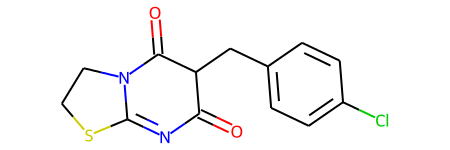

In [718]:
M48= mol_list [47]
M48

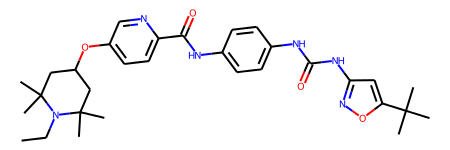

In [719]:
M49= mol_list [48]
M49

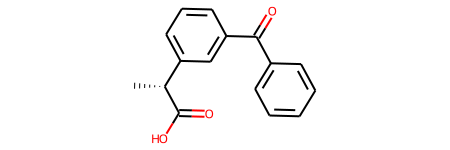

In [720]:
M50= mol_list [49]
M50

In [721]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[299, 314, 356, 399, 452, 556, 561, 650, 659]

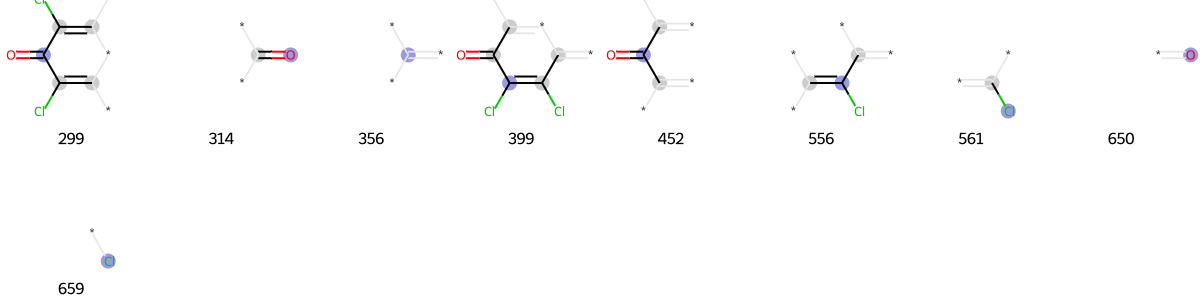

In [722]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [723]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[3,
 53,
 64,
 90,
 137,
 175,
 208,
 212,
 255,
 284,
 298,
 305,
 356,
 389,
 470,
 578,
 583,
 589,
 636,
 639,
 649,
 654,
 662,
 714,
 726,
 735,
 807,
 814,
 849,
 875,
 926,
 1019]

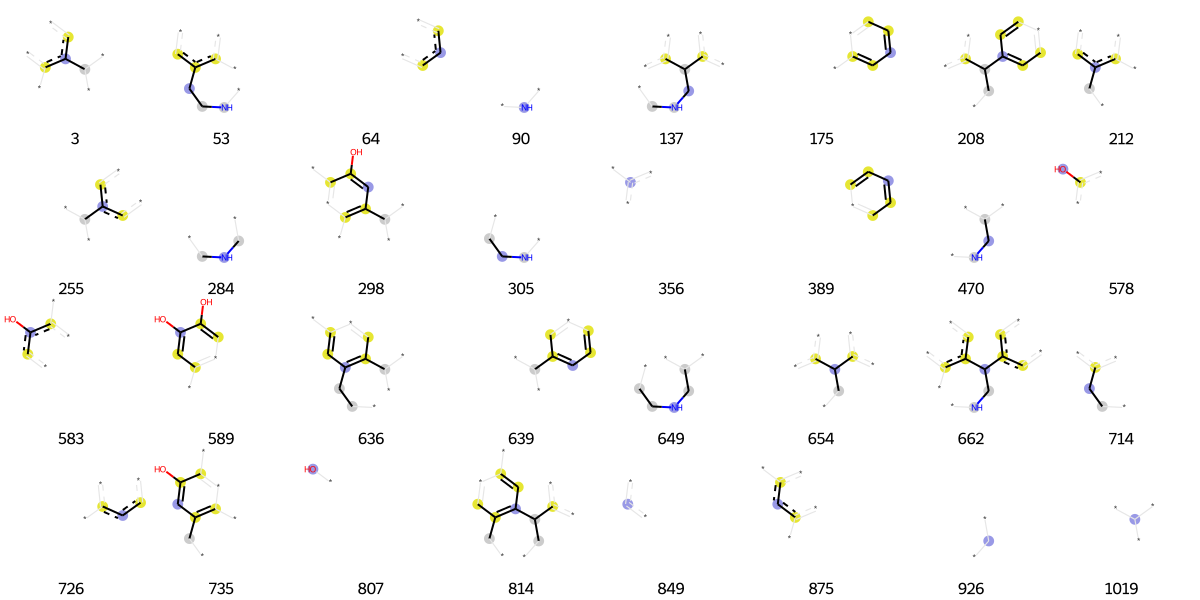

In [724]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [725]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 15,
 33,
 64,
 69,
 104,
 128,
 130,
 165,
 184,
 191,
 216,
 283,
 330,
 356,
 561,
 585,
 592,
 650,
 659,
 695,
 703,
 726,
 734,
 792,
 807,
 849,
 875,
 893,
 954,
 972]

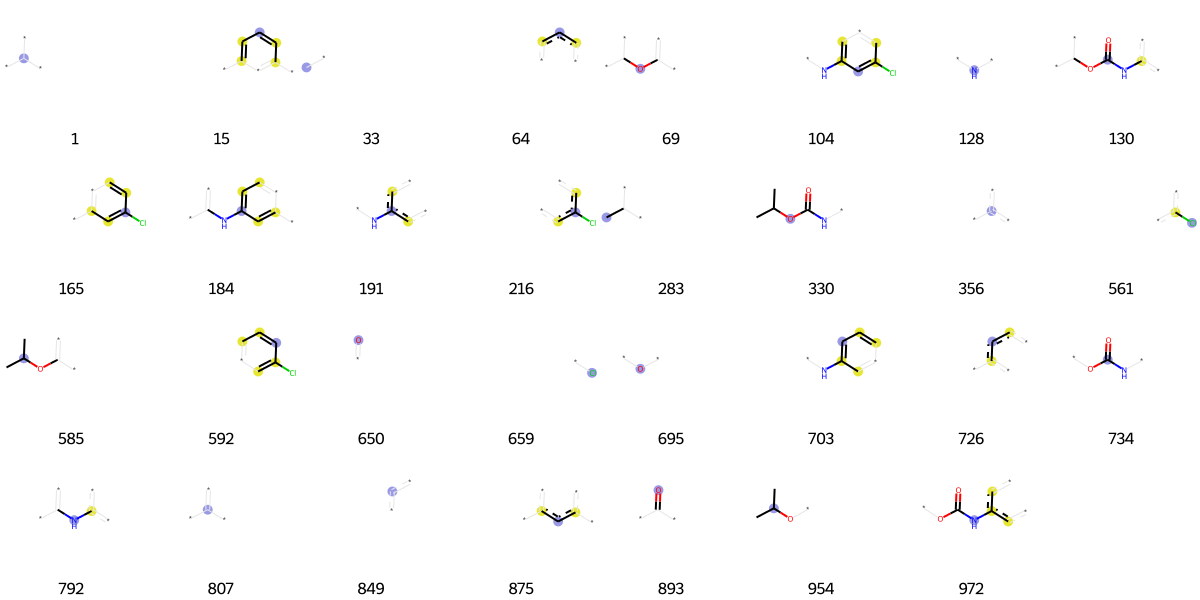

In [726]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [727]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 45,
 46,
 64,
 73,
 80,
 175,
 216,
 261,
 289,
 310,
 335,
 356,
 357,
 378,
 485,
 495,
 561,
 659,
 698,
 726,
 730,
 741,
 802,
 816,
 831,
 849,
 888,
 917,
 935,
 1014]

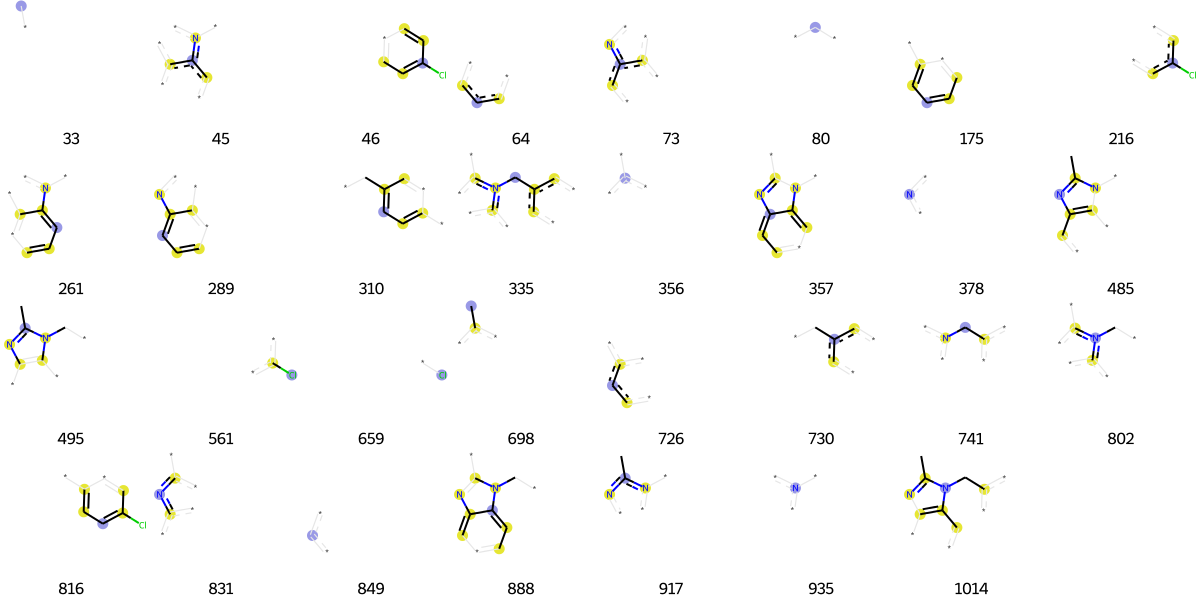

In [728]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [729]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 33,
 46,
 54,
 55,
 64,
 73,
 117,
 118,
 128,
 136,
 147,
 175,
 284,
 289,
 333,
 341,
 356,
 378,
 379,
 389,
 428,
 486,
 549,
 557,
 650,
 695,
 726,
 736,
 799,
 807,
 818,
 831,
 841,
 849,
 875,
 893,
 916,
 917,
 947,
 967,
 980,
 991]

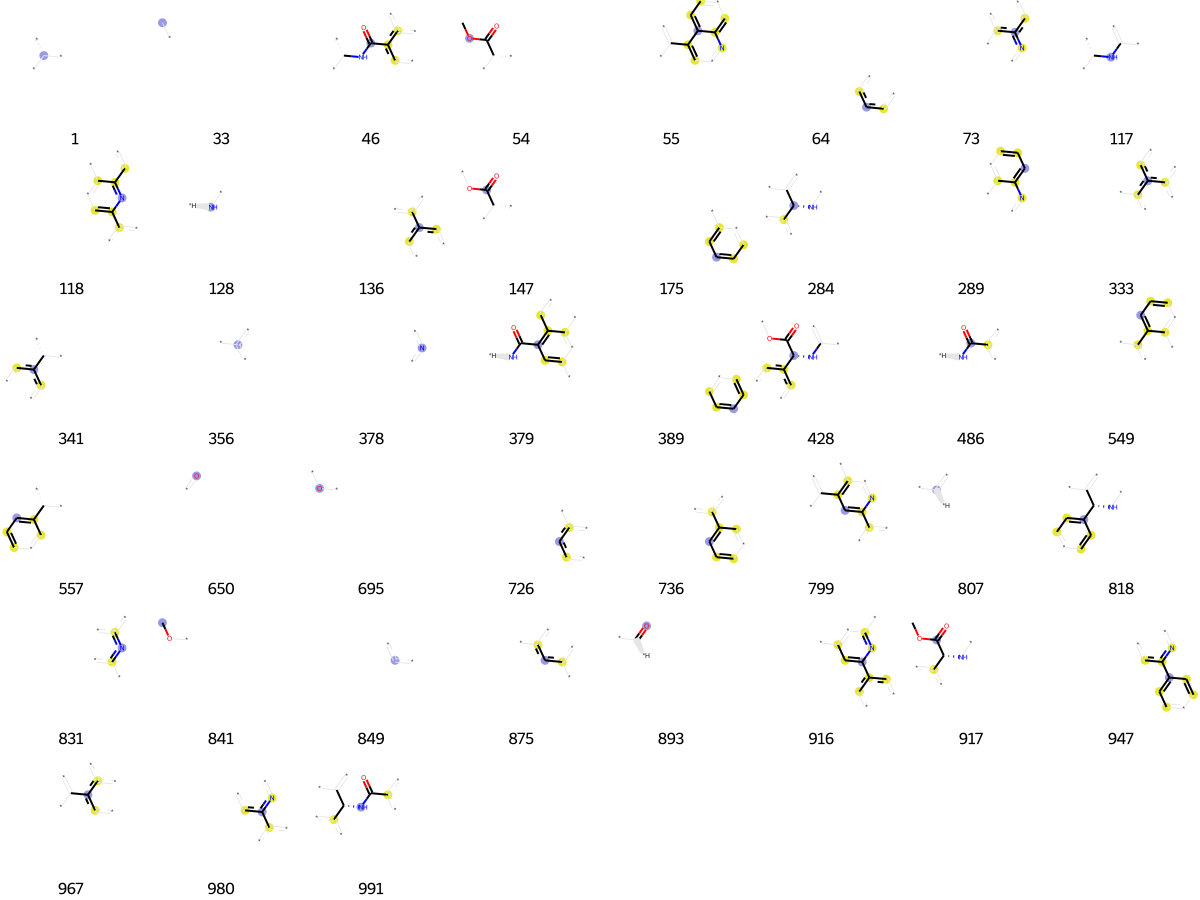

In [730]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [731]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33,
 60,
 73,
 80,
 116,
 147,
 158,
 165,
 216,
 230,
 276,
 322,
 333,
 341,
 343,
 356,
 378,
 379,
 389,
 493,
 512,
 561,
 562,
 659,
 692,
 695,
 718,
 726,
 781,
 816,
 831,
 841,
 849,
 854,
 875,
 887,
 948,
 961,
 967,
 981]

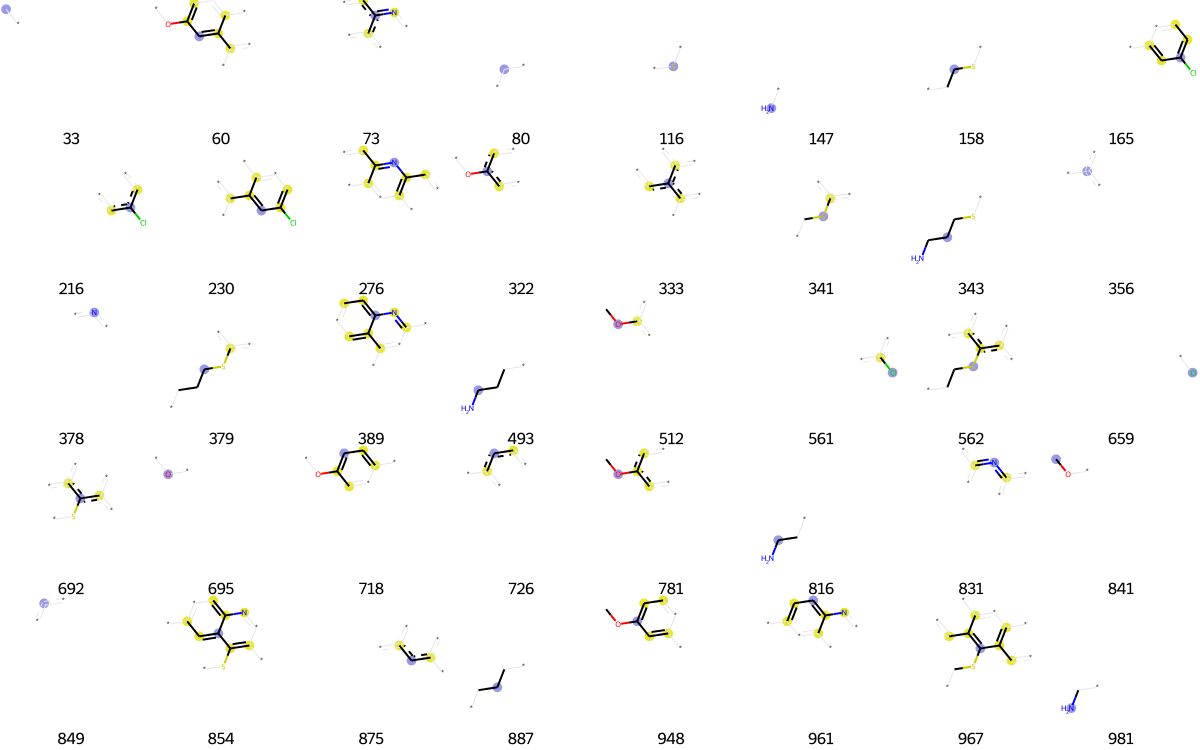

In [732]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [733]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[64,
 80,
 104,
 175,
 202,
 238,
 305,
 314,
 333,
 356,
 368,
 406,
 442,
 444,
 549,
 553,
 578,
 580,
 650,
 656,
 707,
 726,
 784,
 807,
 849,
 953,
 1010]

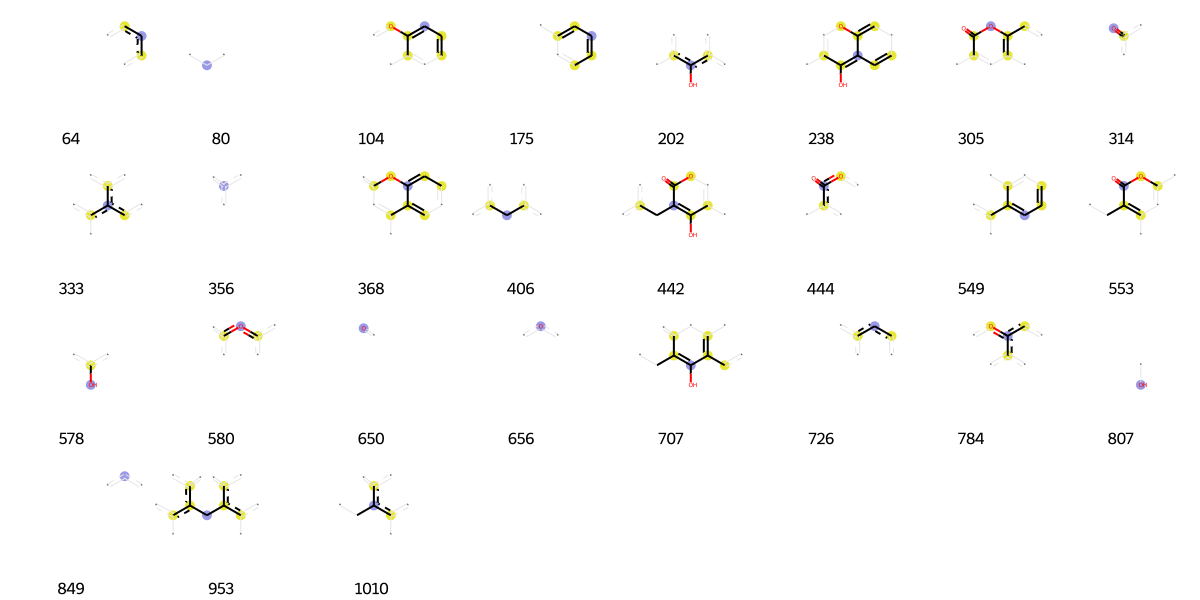

In [734]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [735]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[36,
 64,
 147,
 184,
 207,
 335,
 350,
 381,
 389,
 398,
 407,
 469,
 548,
 586,
 593,
 632,
 650,
 720,
 787,
 807,
 875,
 893,
 926,
 944,
 1009,
 1019]

In [736]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[2, 4, 36, 90, 138, 190, 198, 284, 305, 464, 492, 614, 637, 721, 926]

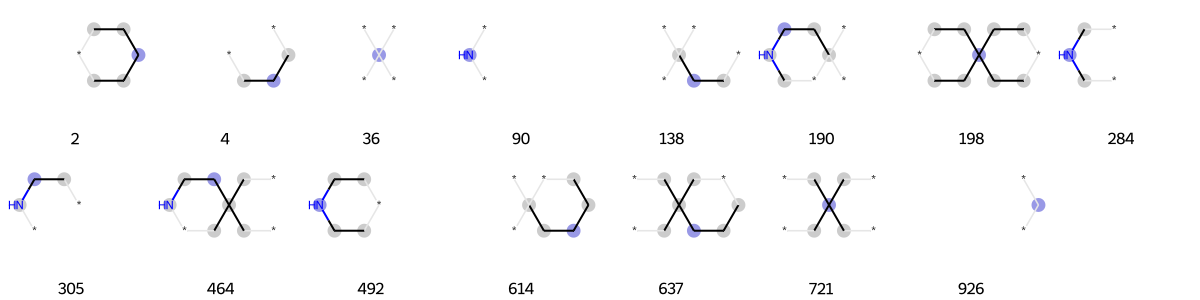

In [737]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [738]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[2,
 4,
 27,
 33,
 38,
 45,
 69,
 84,
 90,
 121,
 129,
 136,
 148,
 165,
 207,
 289,
 296,
 301,
 314,
 322,
 333,
 352,
 356,
 381,
 415,
 417,
 424,
 456,
 469,
 472,
 475,
 490,
 512,
 523,
 602,
 624,
 633,
 650,
 656,
 669,
 680,
 695,
 709,
 718,
 726,
 730,
 751,
 762,
 781,
 841,
 849,
 875,
 879,
 889,
 890,
 895,
 896,
 906,
 919,
 922,
 926,
 935,
 945,
 948,
 950,
 964,
 976,
 978,
 1007,
 1019,
 1020,
 1021]

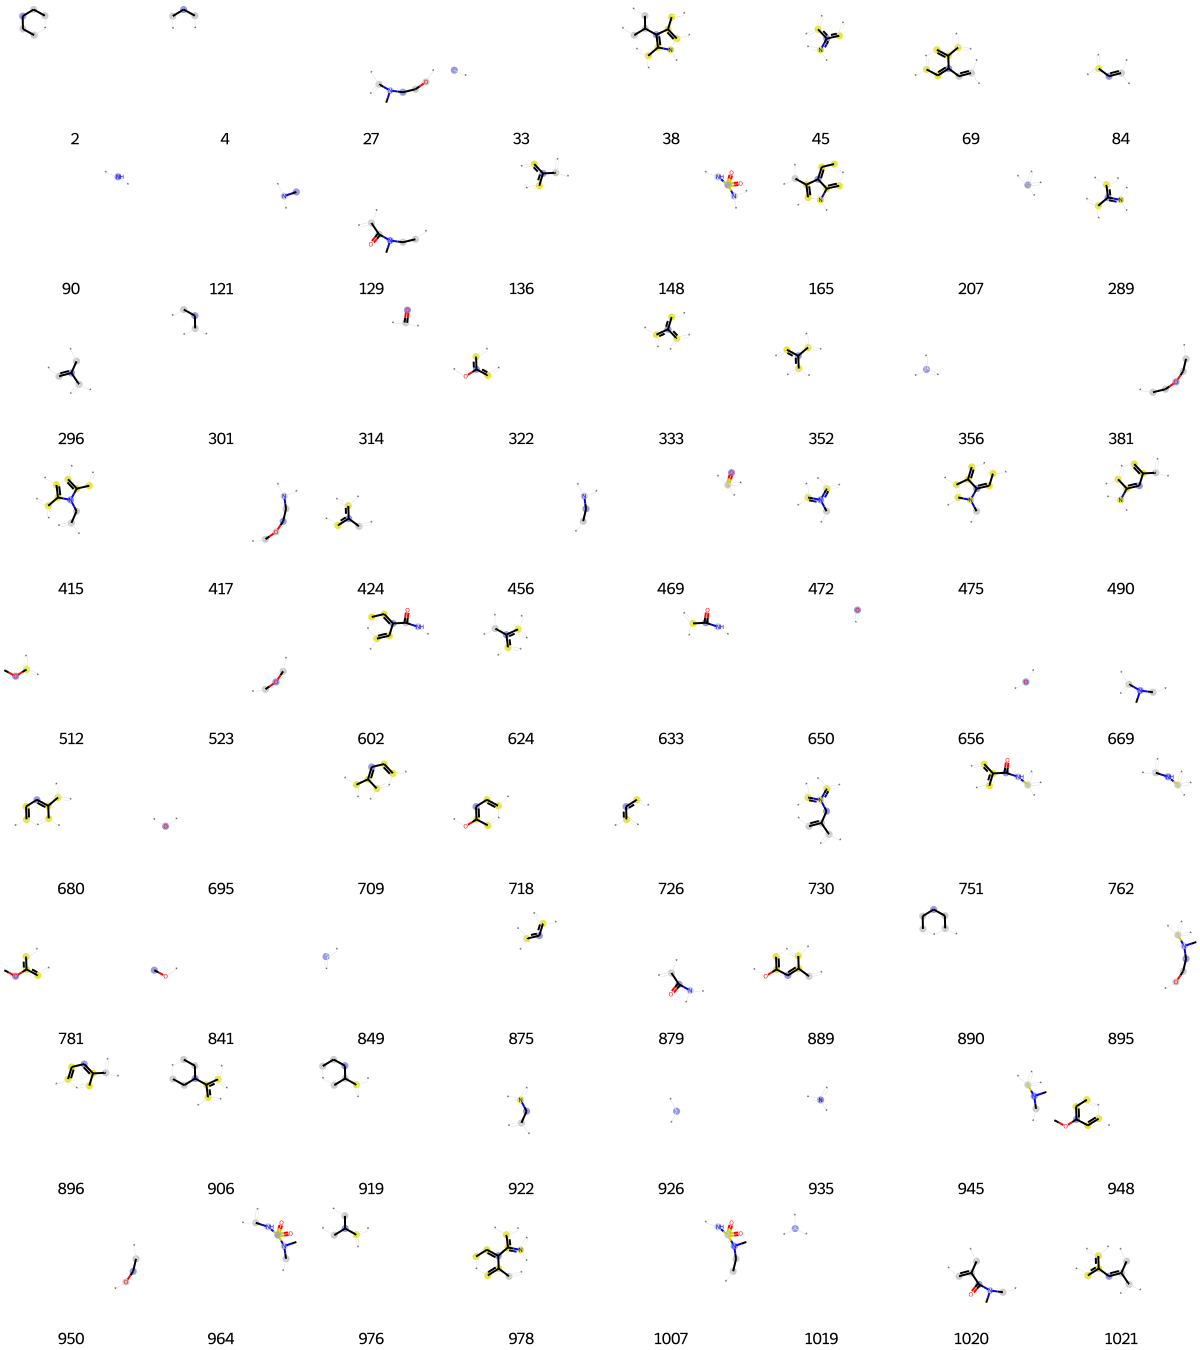

In [739]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [740]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[42,
 64,
 80,
 90,
 119,
 121,
 133,
 175,
 237,
 275,
 301,
 314,
 333,
 356,
 360,
 361,
 386,
 417,
 456,
 458,
 504,
 517,
 549,
 575,
 619,
 646,
 650,
 672,
 673,
 699,
 721,
 726,
 755,
 758,
 759,
 767,
 802,
 807,
 813,
 849,
 885,
 893,
 904,
 926,
 935,
 974,
 987,
 1019]

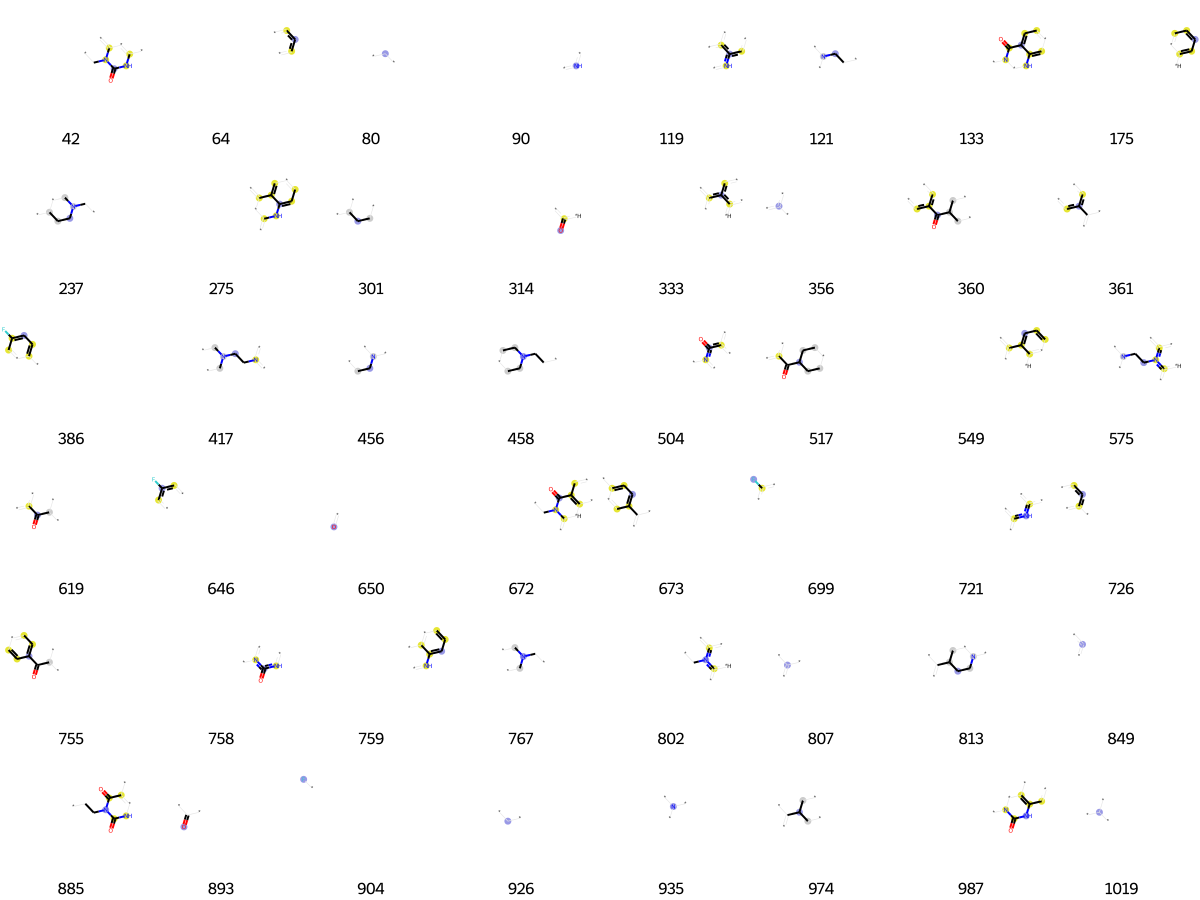

In [741]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [742]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[12,
 13,
 15,
 25,
 64,
 102,
 112,
 117,
 128,
 136,
 175,
 305,
 314,
 356,
 360,
 361,
 378,
 389,
 416,
 486,
 526,
 650,
 674,
 710,
 726,
 736,
 755,
 771,
 790,
 792,
 801,
 807,
 828,
 849,
 875,
 893,
 894,
 932,
 935,
 947,
 951,
 961,
 980,
 998,
 1011]

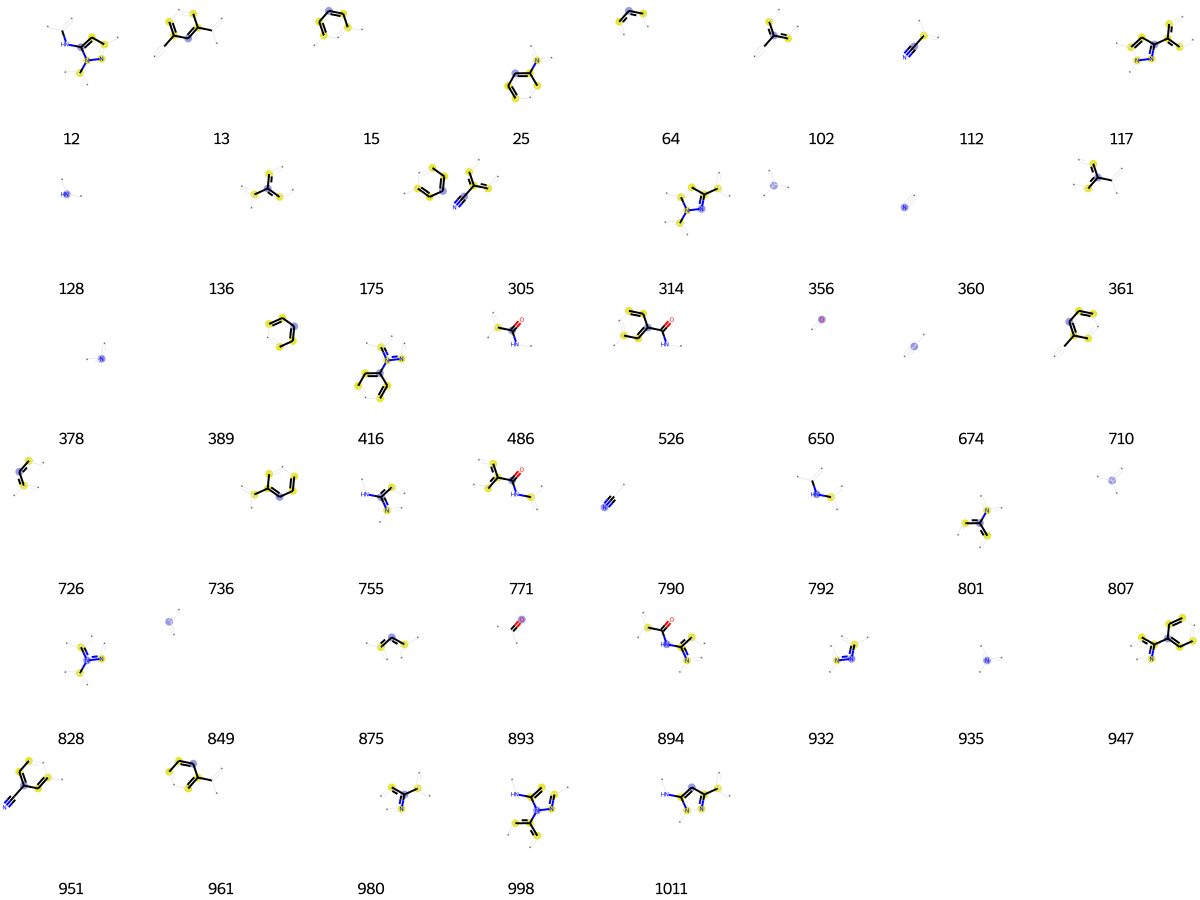

In [743]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [744]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 33,
 42,
 64,
 71,
 75,
 80,
 122,
 128,
 152,
 181,
 185,
 190,
 194,
 221,
 227,
 233,
 255,
 282,
 313,
 345,
 356,
 378,
 392,
 406,
 428,
 454,
 463,
 468,
 505,
 519,
 542,
 561,
 570,
 577,
 650,
 656,
 659,
 661,
 672,
 689,
 700,
 708,
 726,
 730,
 755,
 758,
 778,
 807,
 831,
 849,
 875,
 893,
 897,
 930,
 932,
 933,
 935,
 947,
 960,
 980,
 1019]

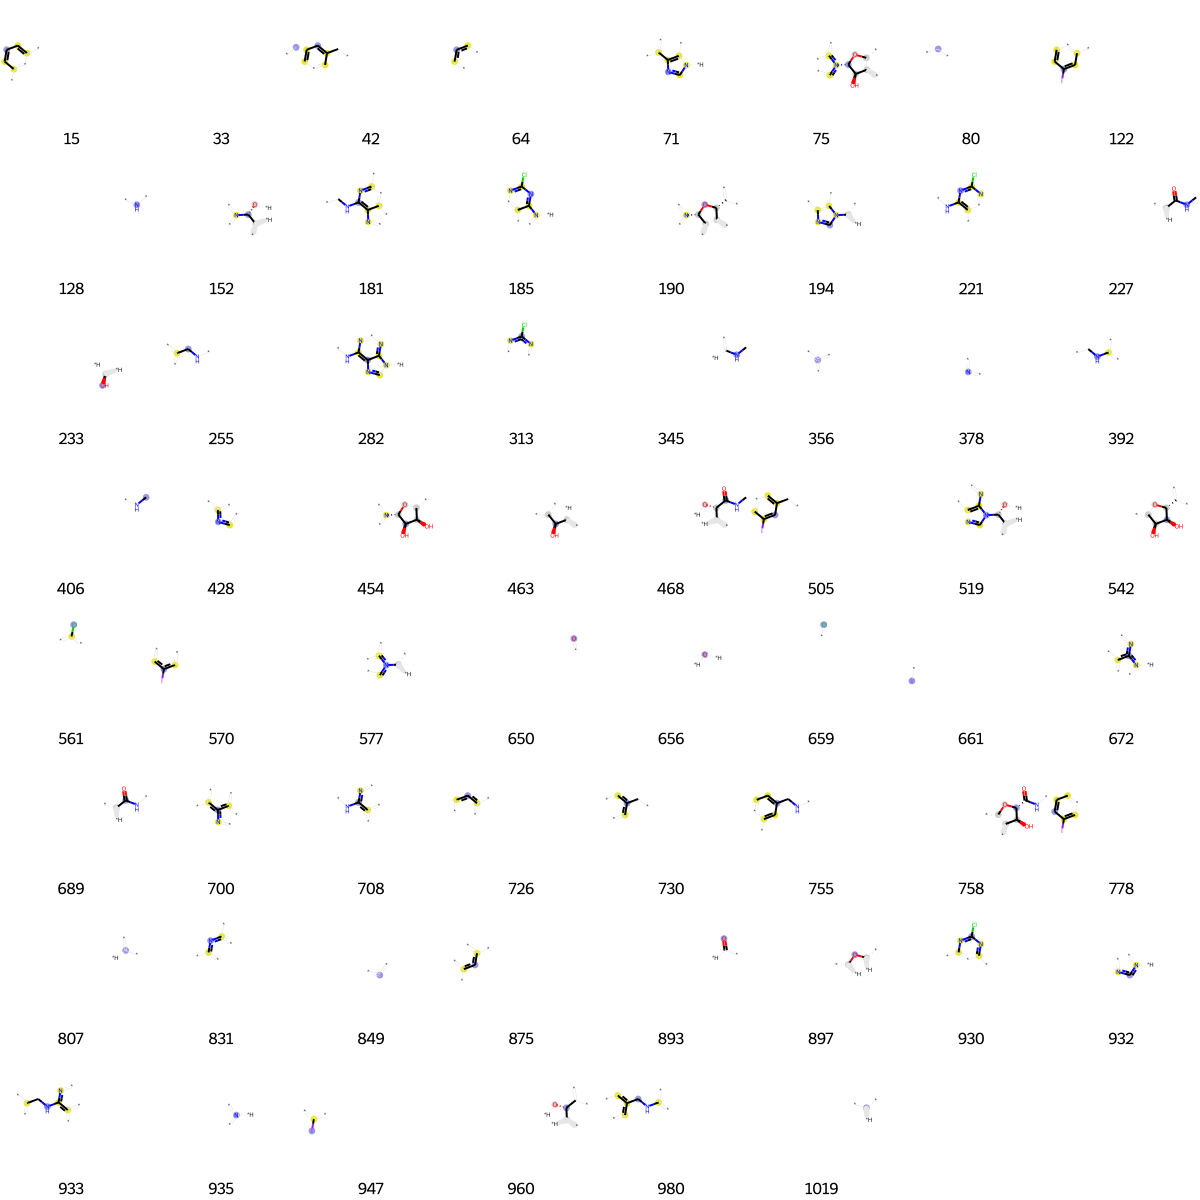

In [745]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [746]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[64, 106, 114, 175, 356, 361, 389, 456, 650, 726, 807, 849, 893, 961]

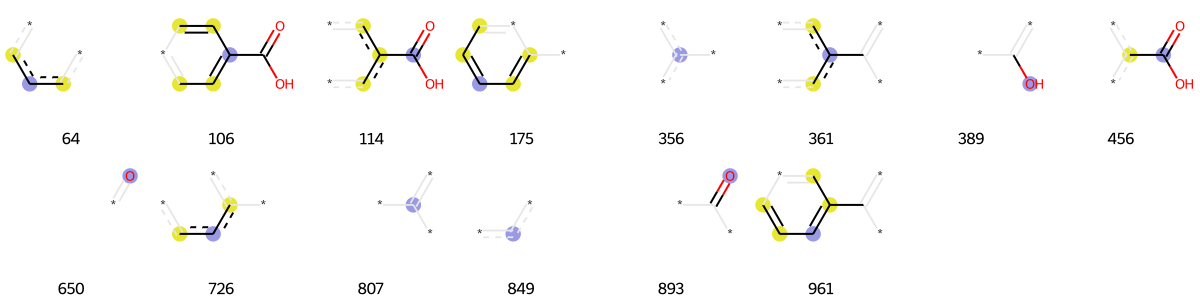

In [747]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [748]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[36,
 64,
 77,
 80,
 90,
 175,
 187,
 189,
 192,
 255,
 287,
 314,
 356,
 358,
 389,
 486,
 556,
 563,
 588,
 620,
 650,
 692,
 695,
 715,
 716,
 726,
 770,
 772,
 779,
 849,
 852,
 884,
 907,
 935,
 961]

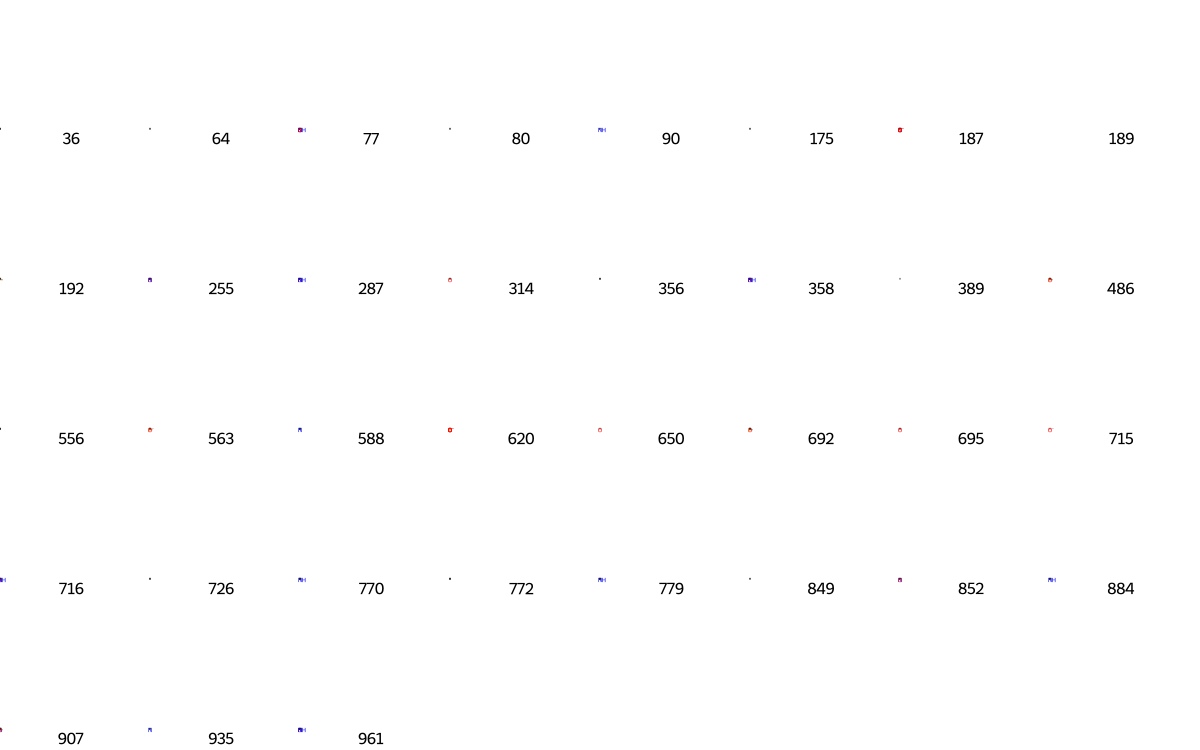

In [749]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [750]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[15,
 33,
 63,
 64,
 80,
 88,
 128,
 175,
 271,
 333,
 345,
 356,
 386,
 406,
 549,
 650,
 695,
 705,
 726,
 734,
 757,
 807,
 831,
 849,
 865,
 872,
 893,
 946]

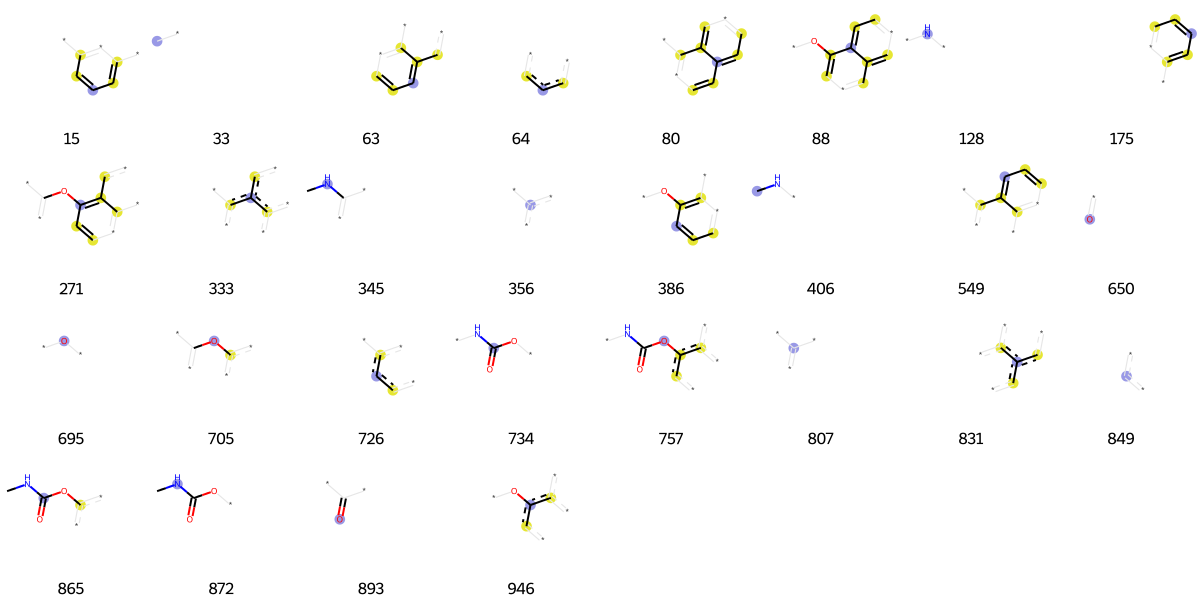

In [751]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [752]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[14,
 33,
 64,
 79,
 80,
 128,
 140,
 145,
 147,
 162,
 203,
 241,
 250,
 295,
 300,
 322,
 338,
 350,
 356,
 383,
 399,
 419,
 426,
 452,
 493,
 543,
 555,
 556,
 592,
 597,
 623,
 650,
 675,
 692,
 695,
 705,
 709,
 718,
 726,
 807,
 831,
 849,
 866,
 875,
 885,
 893,
 915]

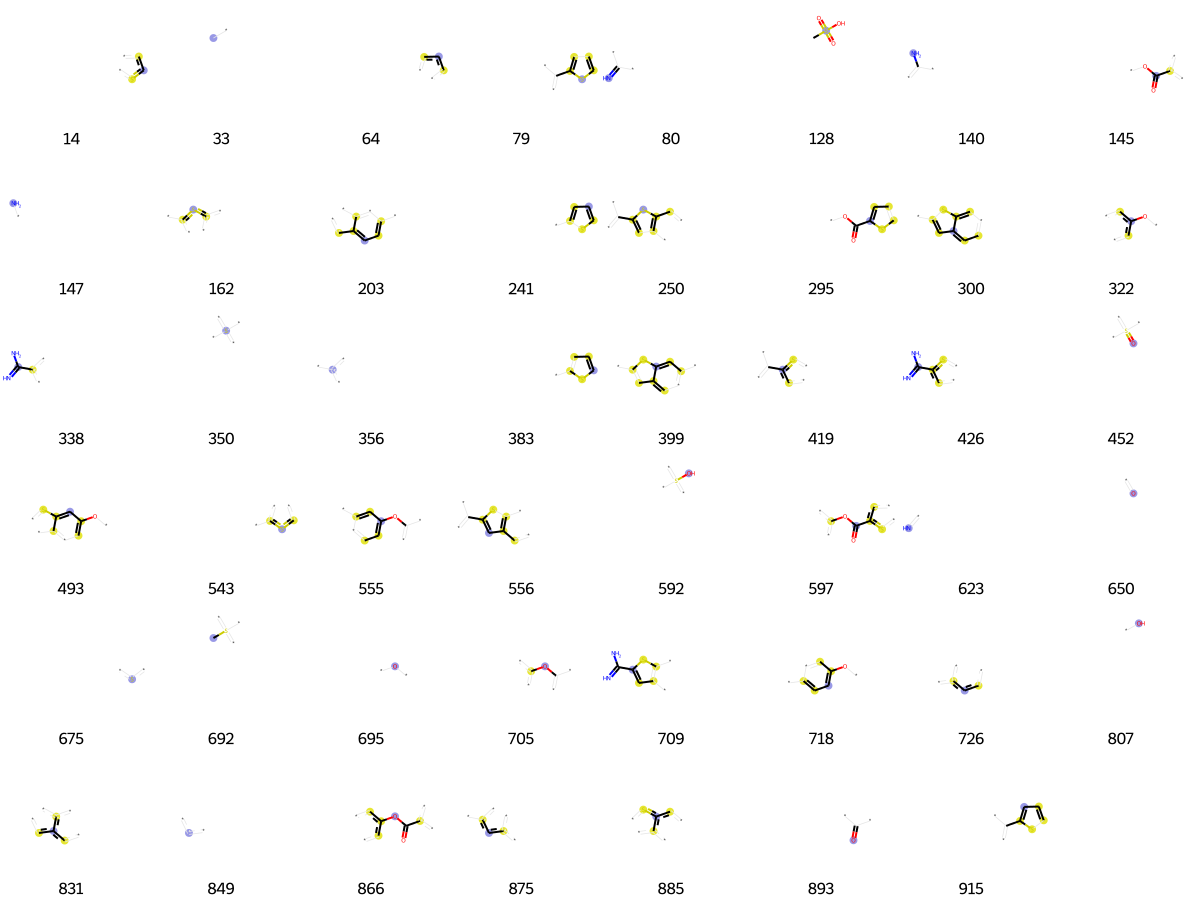

In [753]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [754]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[2,
 4,
 33,
 128,
 136,
 165,
 185,
 216,
 252,
 271,
 289,
 319,
 351,
 356,
 366,
 378,
 456,
 470,
 486,
 490,
 503,
 516,
 539,
 561,
 570,
 650,
 659,
 661,
 698,
 714,
 726,
 772,
 807,
 816,
 820,
 828,
 849,
 850,
 871,
 875,
 891,
 892,
 893,
 896,
 926,
 932,
 935,
 947,
 970,
 974,
 999,
 1020]

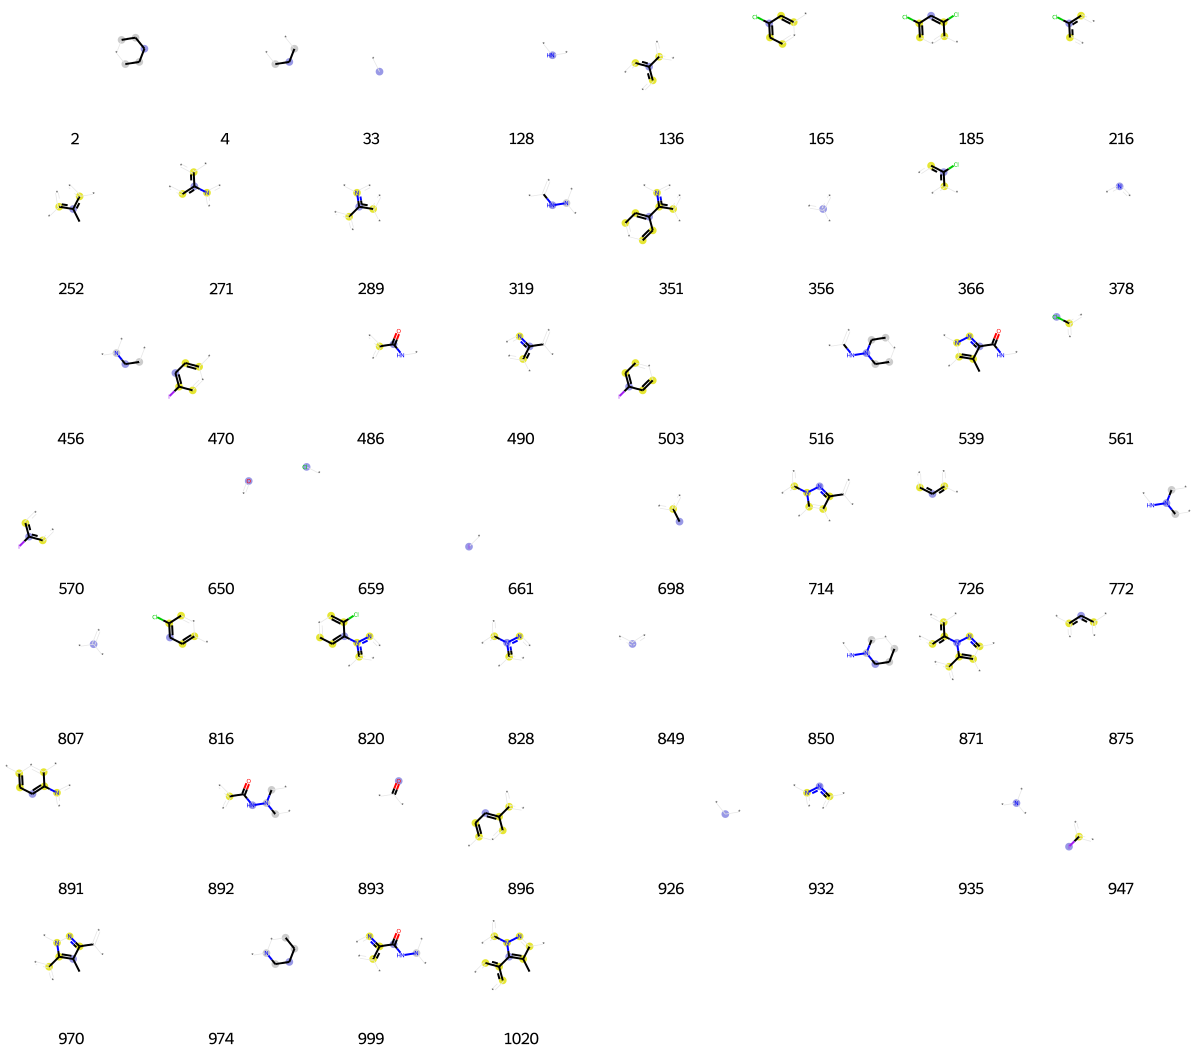

In [755]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [756]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 45,
 73,
 90,
 108,
 109,
 114,
 121,
 126,
 128,
 157,
 167,
 191,
 228,
 236,
 296,
 312,
 322,
 346,
 356,
 370,
 378,
 383,
 388,
 393,
 426,
 428,
 429,
 491,
 500,
 511,
 514,
 564,
 585,
 587,
 593,
 619,
 641,
 695,
 718,
 721,
 726,
 787,
 809,
 818,
 831,
 842,
 843,
 849,
 875,
 879,
 904,
 911,
 935,
 954,
 961,
 980,
 997]

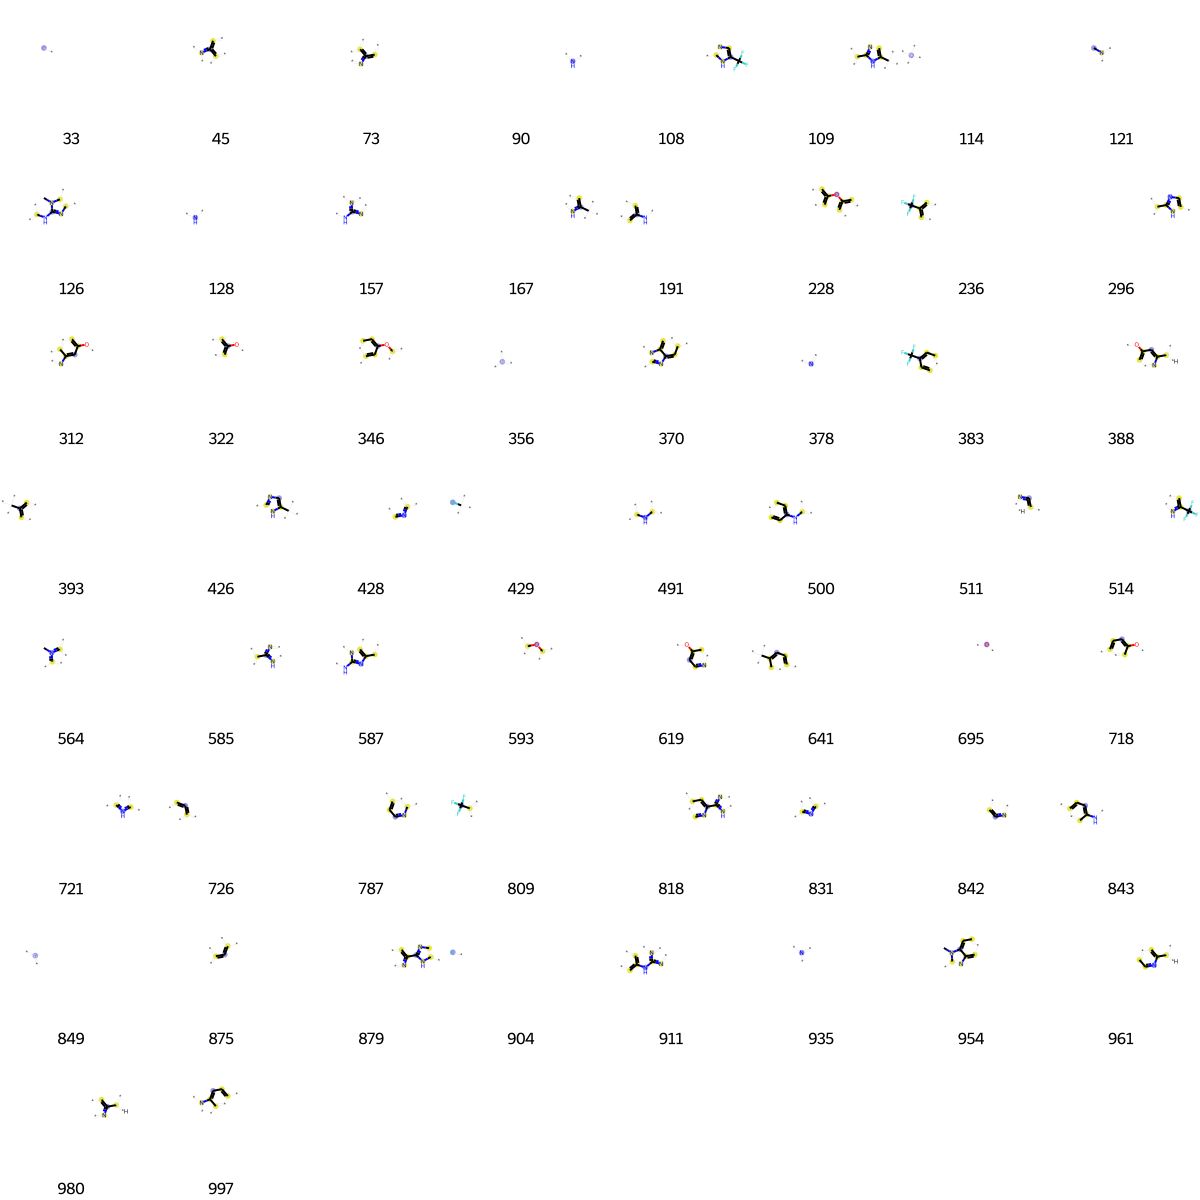

In [757]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [758]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 36,
 64,
 83,
 136,
 138,
 147,
 157,
 217,
 250,
 257,
 270,
 277,
 302,
 352,
 356,
 378,
 433,
 489,
 511,
 513,
 524,
 567,
 579,
 617,
 648,
 675,
 699,
 789,
 793,
 797,
 816,
 847,
 849,
 855,
 875,
 904,
 911,
 926,
 956,
 960]

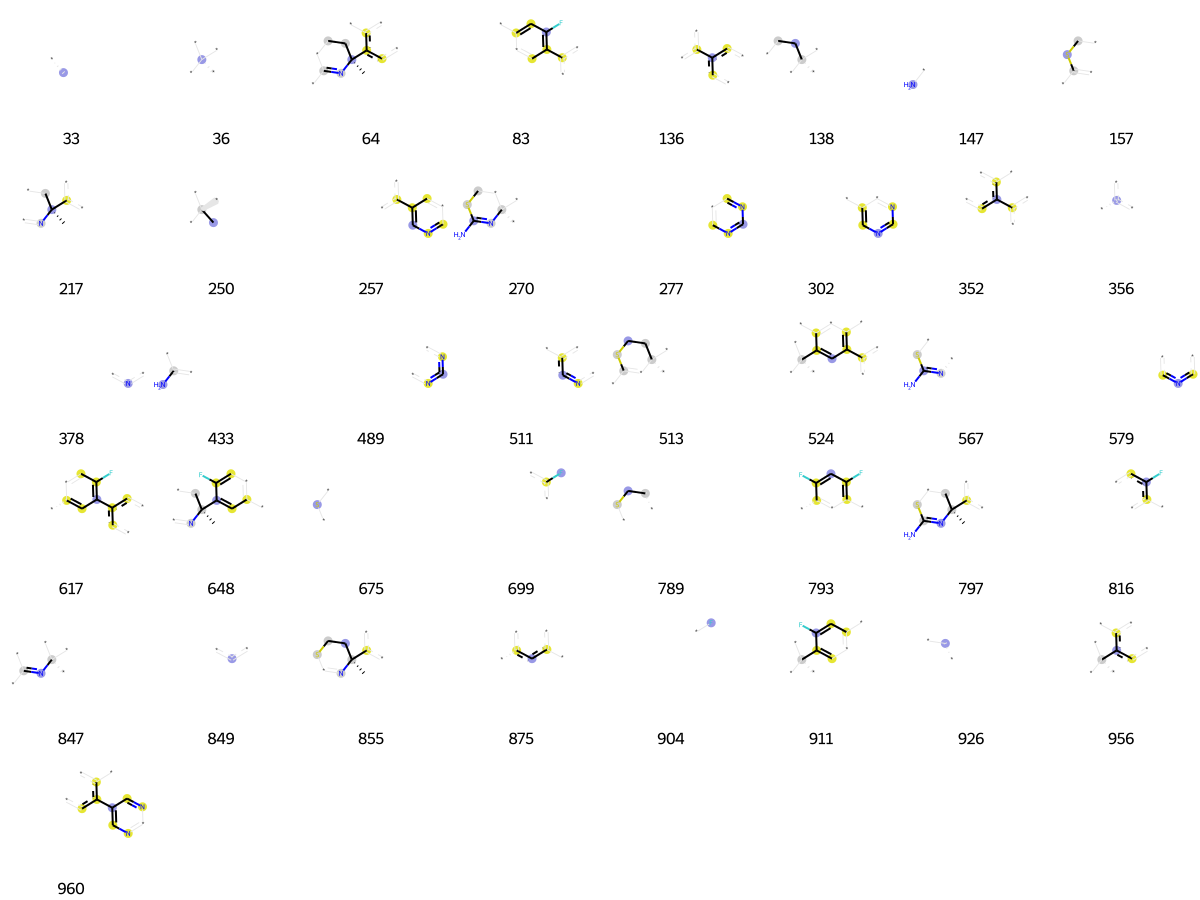

In [759]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [760]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[20,
 21,
 42,
 43,
 64,
 80,
 85,
 121,
 129,
 147,
 158,
 175,
 204,
 209,
 211,
 219,
 300,
 333,
 356,
 361,
 378,
 389,
 412,
 424,
 433,
 474,
 511,
 629,
 656,
 672,
 726,
 730,
 753,
 774,
 781,
 787,
 804,
 825,
 831,
 833,
 849,
 891,
 902,
 932,
 935,
 964,
 1017]

In [761]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[13,
 49,
 58,
 80,
 210,
 222,
 233,
 299,
 310,
 322,
 356,
 463,
 489,
 492,
 524,
 610,
 656,
 695,
 696,
 718,
 726,
 730,
 740,
 807,
 819,
 820,
 837,
 849,
 897,
 953,
 964,
 1019]

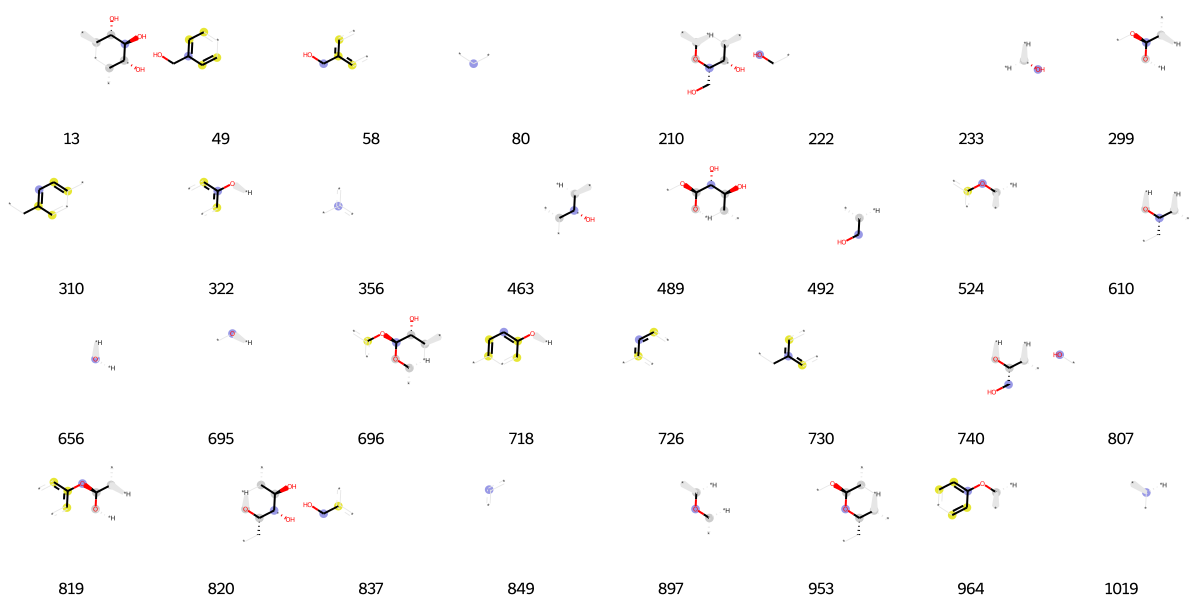

In [762]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [763]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[8,
 63,
 64,
 71,
 128,
 140,
 147,
 175,
 281,
 333,
 356,
 378,
 511,
 514,
 549,
 606,
 647,
 677,
 708,
 726,
 818,
 831,
 841,
 849,
 871,
 959]

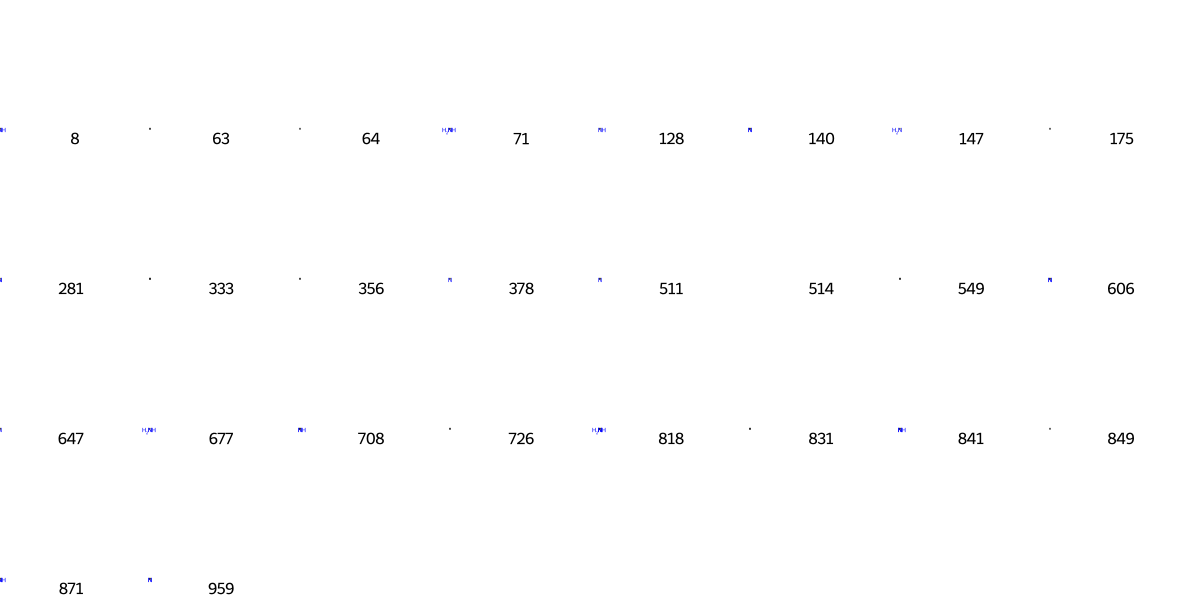

In [764]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [765]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[23,
 63,
 64,
 80,
 175,
 202,
 240,
 333,
 356,
 389,
 406,
 456,
 549,
 578,
 612,
 650,
 726,
 807,
 831,
 836,
 846,
 849,
 875,
 893,
 944,
 953,
 954,
 967,
 1010]

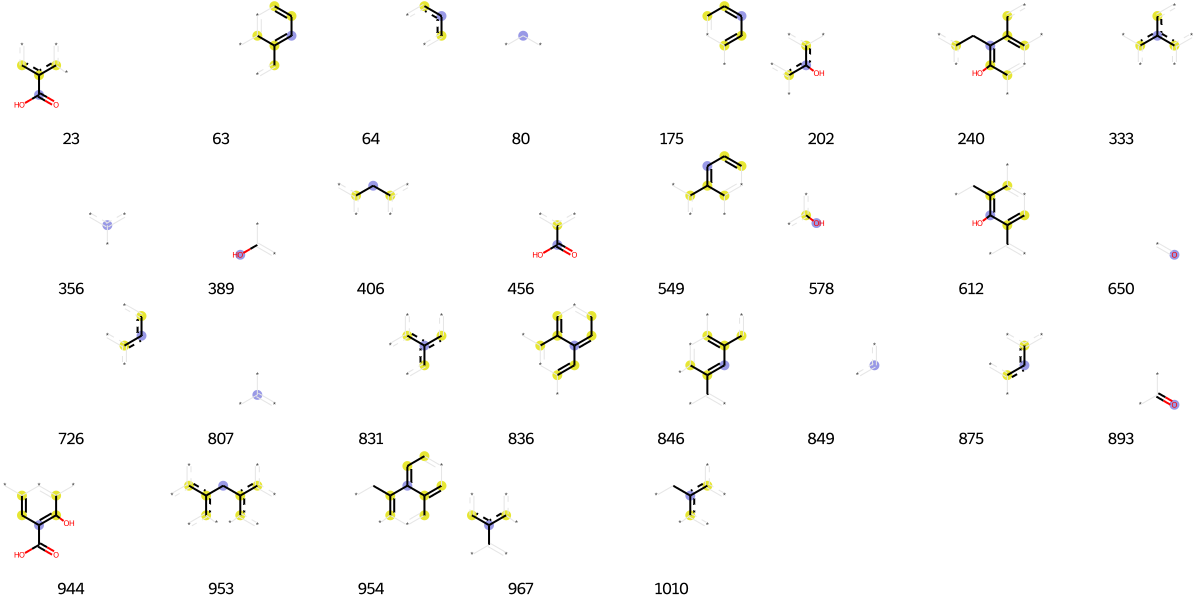

In [766]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [767]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 4,
 16,
 29,
 33,
 72,
 90,
 94,
 108,
 117,
 128,
 136,
 187,
 193,
 231,
 242,
 275,
 283,
 288,
 300,
 301,
 339,
 353,
 356,
 378,
 428,
 446,
 456,
 507,
 510,
 511,
 571,
 650,
 651,
 653,
 695,
 721,
 726,
 734,
 749,
 807,
 841,
 849,
 864,
 874,
 893,
 896,
 926,
 935,
 940,
 971,
 1019]

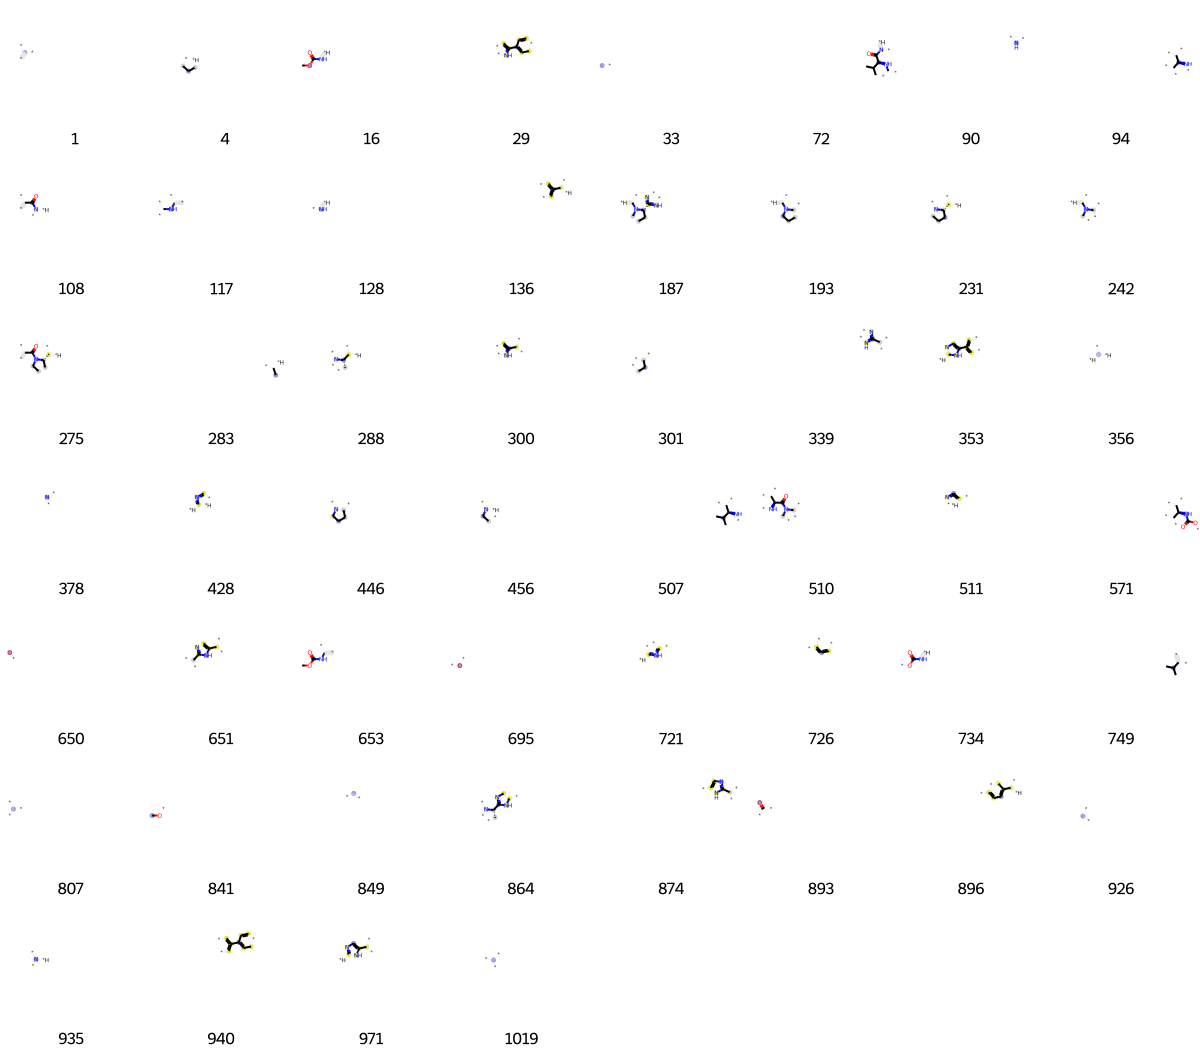

In [768]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [769]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[13,
 26,
 33,
 34,
 74,
 76,
 80,
 90,
 94,
 121,
 193,
 205,
 219,
 222,
 235,
 242,
 268,
 294,
 314,
 319,
 325,
 350,
 352,
 356,
 357,
 366,
 378,
 416,
 428,
 429,
 431,
 452,
 456,
 458,
 464,
 473,
 494,
 564,
 585,
 650,
 652,
 672,
 695,
 700,
 702,
 705,
 715,
 721,
 726,
 750,
 757,
 767,
 780,
 794,
 800,
 807,
 825,
 831,
 849,
 850,
 853,
 870,
 875,
 926,
 935,
 946,
 977]

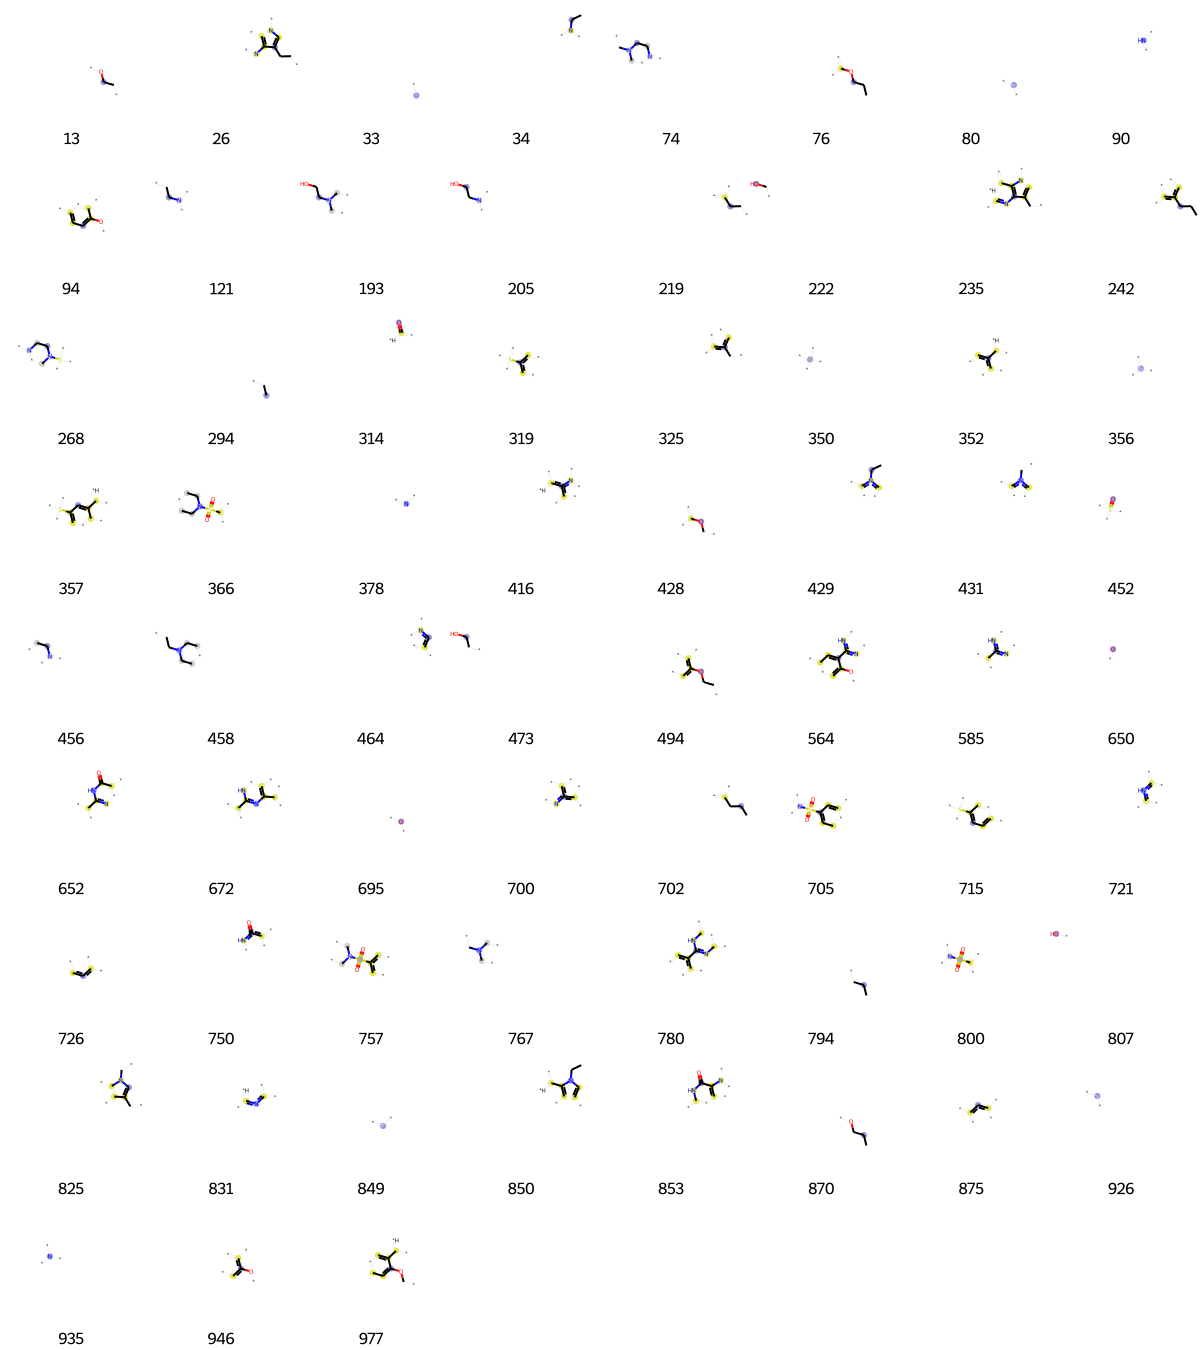

In [770]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [771]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[16,
 33,
 80,
 90,
 119,
 128,
 184,
 191,
 197,
 219,
 220,
 245,
 325,
 328,
 333,
 356,
 364,
 476,
 650,
 667,
 695,
 726,
 728,
 731,
 734,
 792,
 806,
 807,
 828,
 841,
 843,
 849,
 855,
 875,
 884,
 893,
 913,
 915,
 922,
 972,
 984,
 1017]

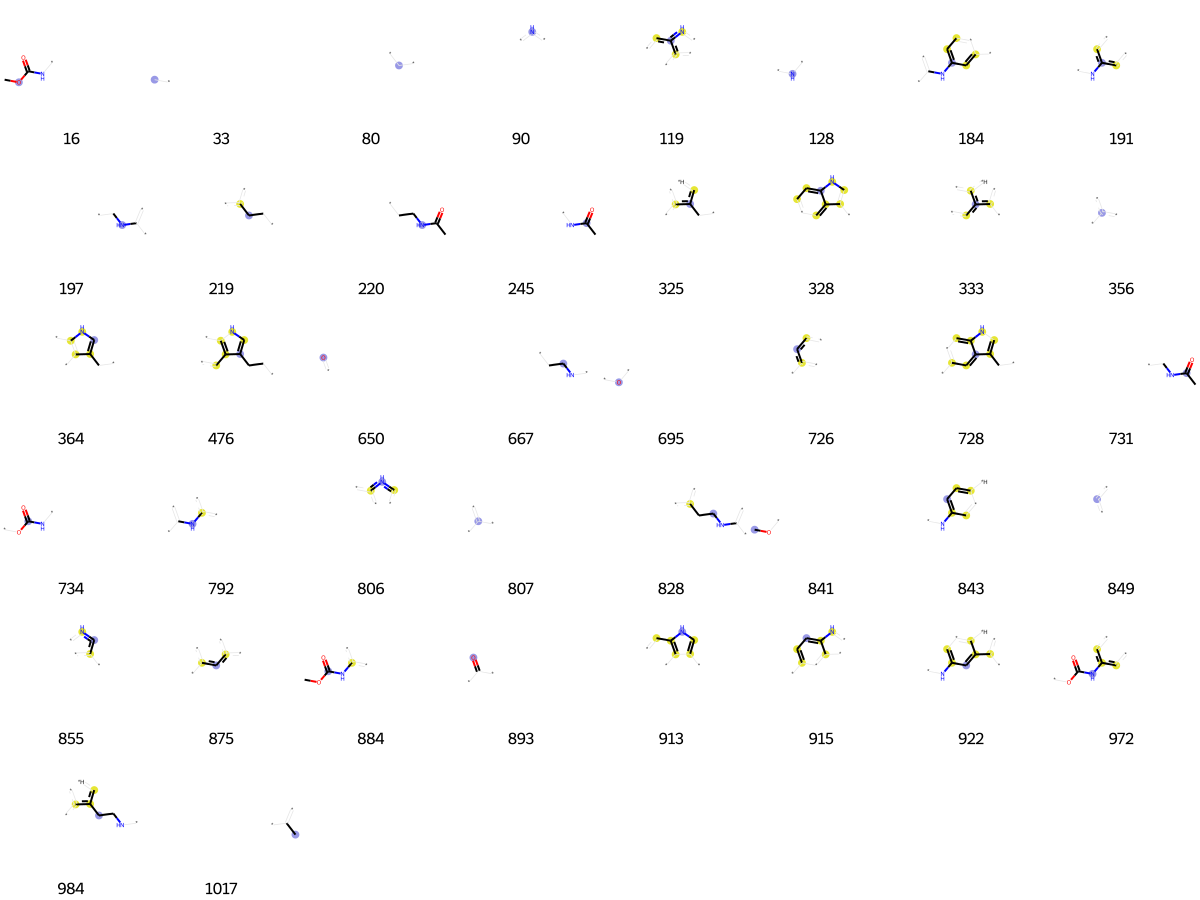

In [772]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [773]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[0,
 33,
 80,
 121,
 125,
 179,
 205,
 222,
 234,
 283,
 314,
 351,
 356,
 378,
 400,
 416,
 420,
 428,
 431,
 473,
 504,
 564,
 574,
 650,
 672,
 771,
 807,
 849,
 932,
 935]

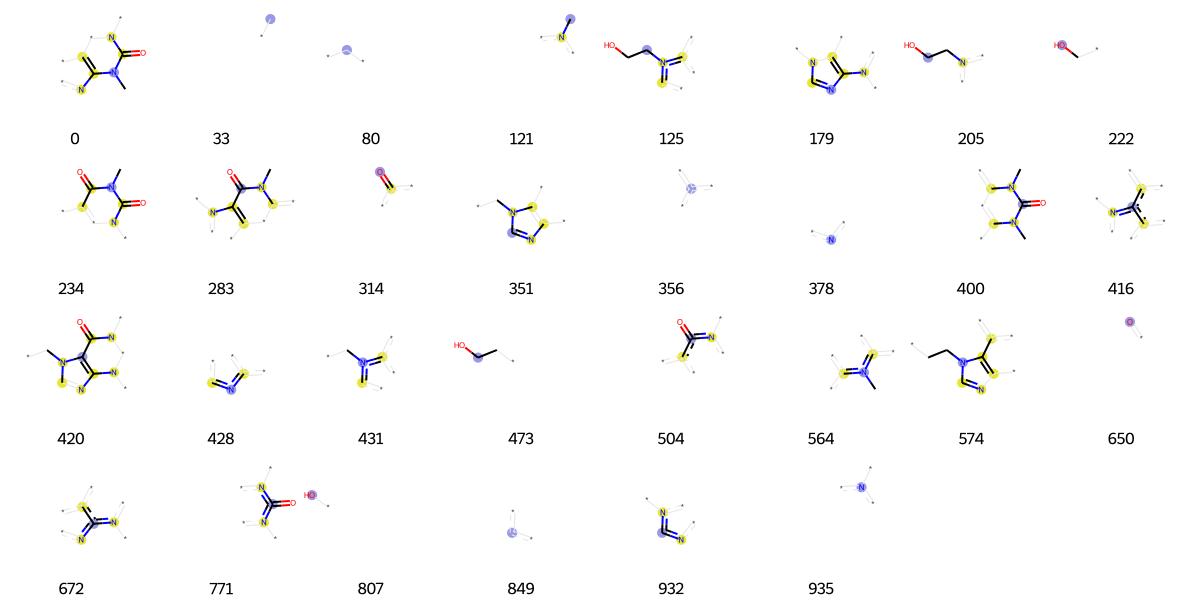

In [774]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [775]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[77,
 80,
 114,
 192,
 349,
 378,
 439,
 476,
 486,
 494,
 579,
 630,
 650,
 787,
 807,
 814,
 842,
 843,
 849,
 874,
 884,
 889,
 908,
 932,
 935,
 953,
 999]

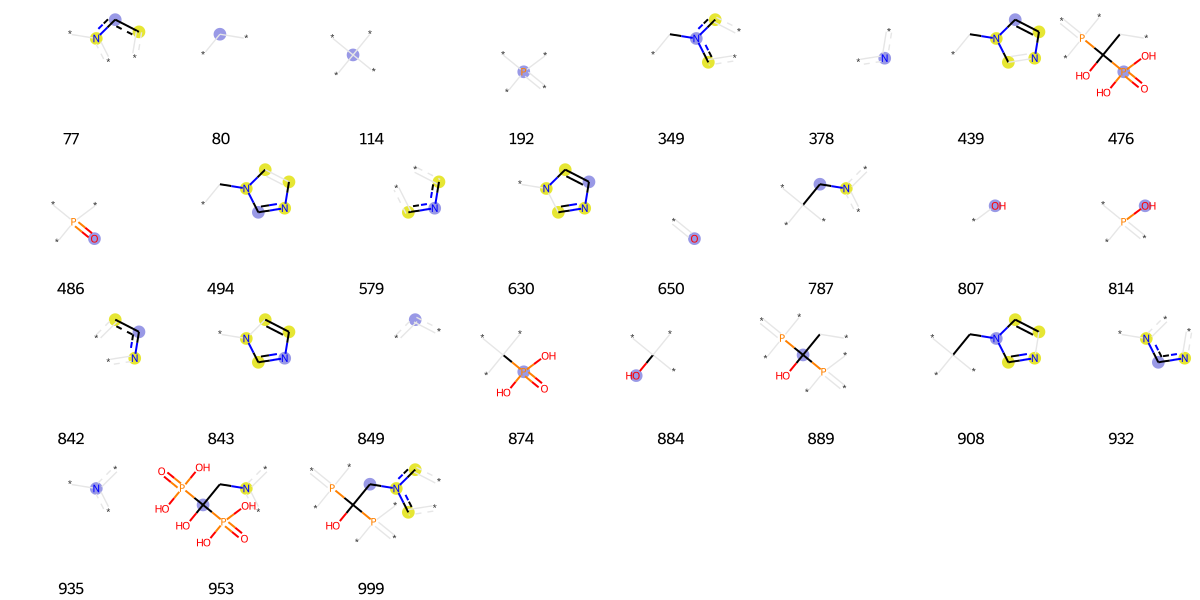

In [776]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [777]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[0,
 1,
 16,
 33,
 36,
 51,
 68,
 78,
 108,
 114,
 117,
 119,
 128,
 139,
 165,
 173,
 189,
 201,
 216,
 230,
 231,
 242,
 249,
 268,
 301,
 307,
 310,
 328,
 333,
 342,
 344,
 350,
 356,
 357,
 378,
 381,
 392,
 401,
 402,
 428,
 452,
 483,
 511,
 512,
 523,
 524,
 531,
 550,
 561,
 562,
 598,
 621,
 650,
 654,
 659,
 679,
 684,
 689,
 694,
 695,
 709,
 726,
 727,
 734,
 739,
 749,
 752,
 804,
 807,
 815,
 816,
 819,
 826,
 835,
 837,
 841,
 847,
 849,
 855,
 875,
 893,
 926,
 935,
 940,
 946,
 955,
 988,
 1019]

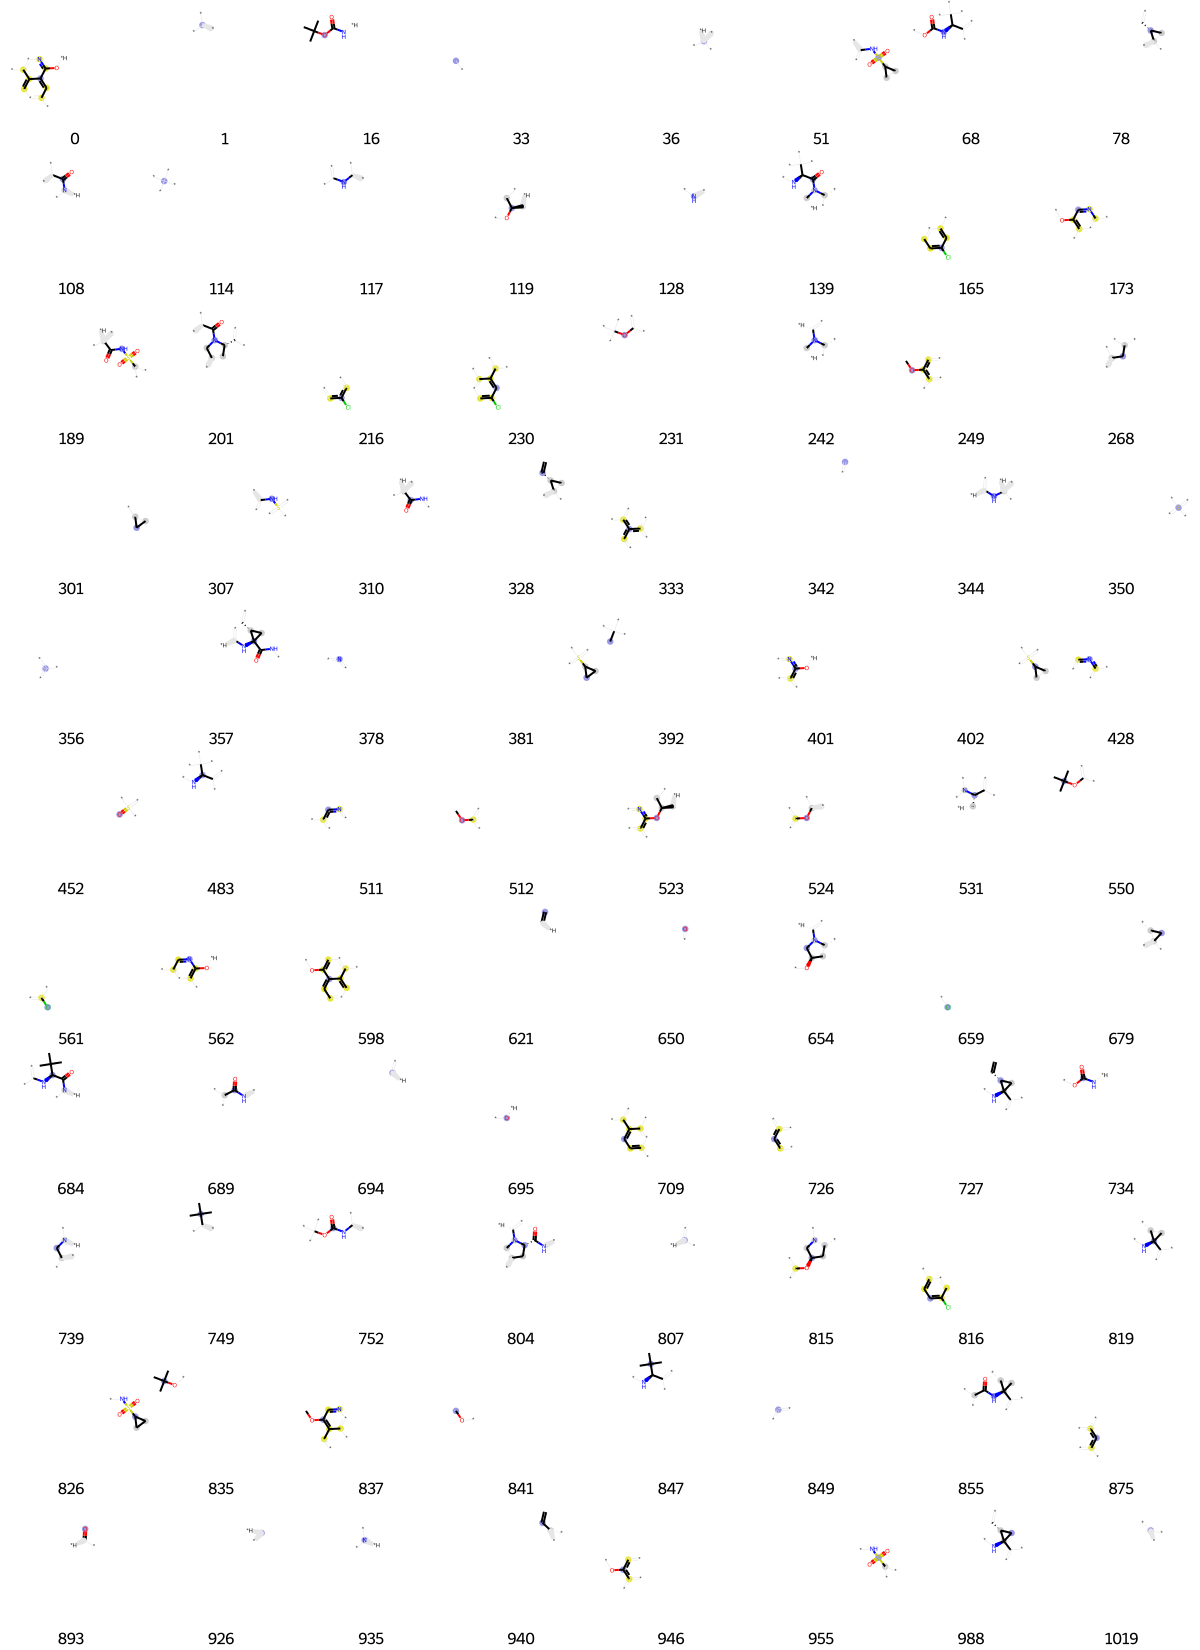

In [778]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [779]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33,
 60,
 73,
 128,
 133,
 191,
 202,
 322,
 333,
 343,
 356,
 378,
 428,
 489,
 491,
 500,
 512,
 629,
 695,
 708,
 718,
 726,
 781,
 786,
 794,
 831,
 841,
 843,
 849,
 875,
 888,
 948,
 961]

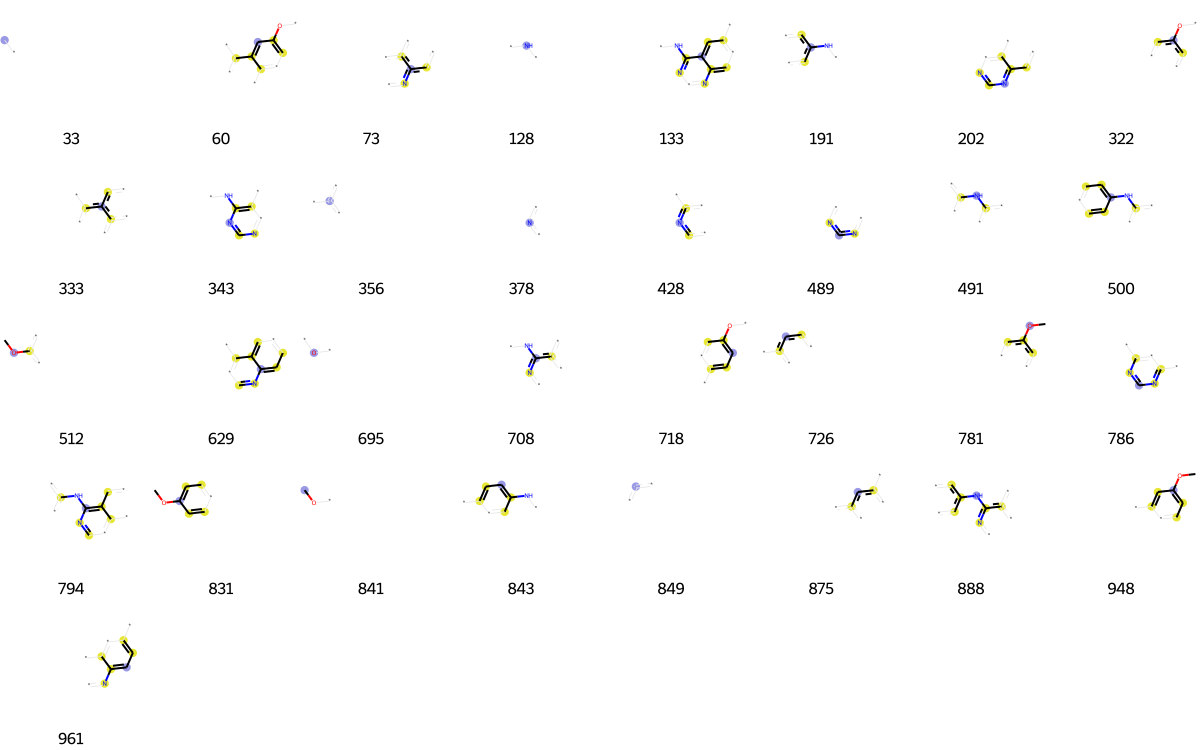

In [780]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [781]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 34,
 76,
 80,
 128,
 166,
 294,
 345,
 351,
 356,
 378,
 406,
 428,
 429,
 431,
 483,
 486,
 490,
 501,
 560,
 650,
 807,
 849,
 861,
 893,
 930,
 932,
 935,
 948]

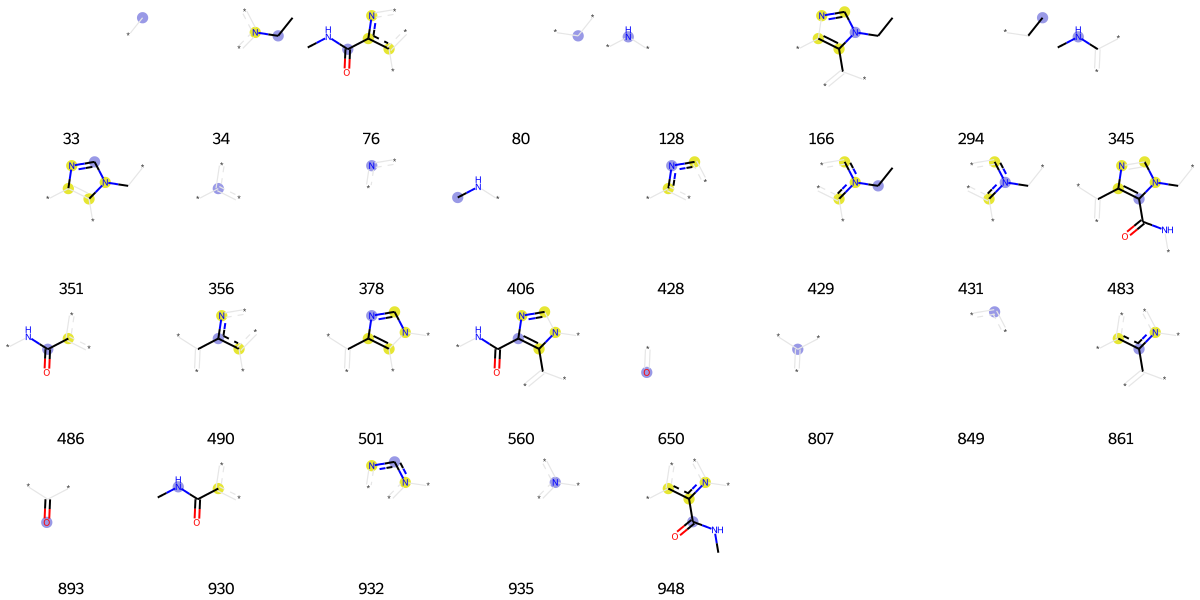

In [782]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [783]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 29,
 80,
 101,
 114,
 128,
 134,
 136,
 191,
 214,
 223,
 255,
 266,
 301,
 319,
 339,
 356,
 378,
 380,
 386,
 389,
 410,
 428,
 429,
 491,
 511,
 588,
 647,
 650,
 685,
 713,
 715,
 722,
 726,
 779,
 797,
 807,
 809,
 820,
 843,
 849,
 893,
 896,
 904,
 926,
 947,
 976,
 980,
 1004,
 1019]

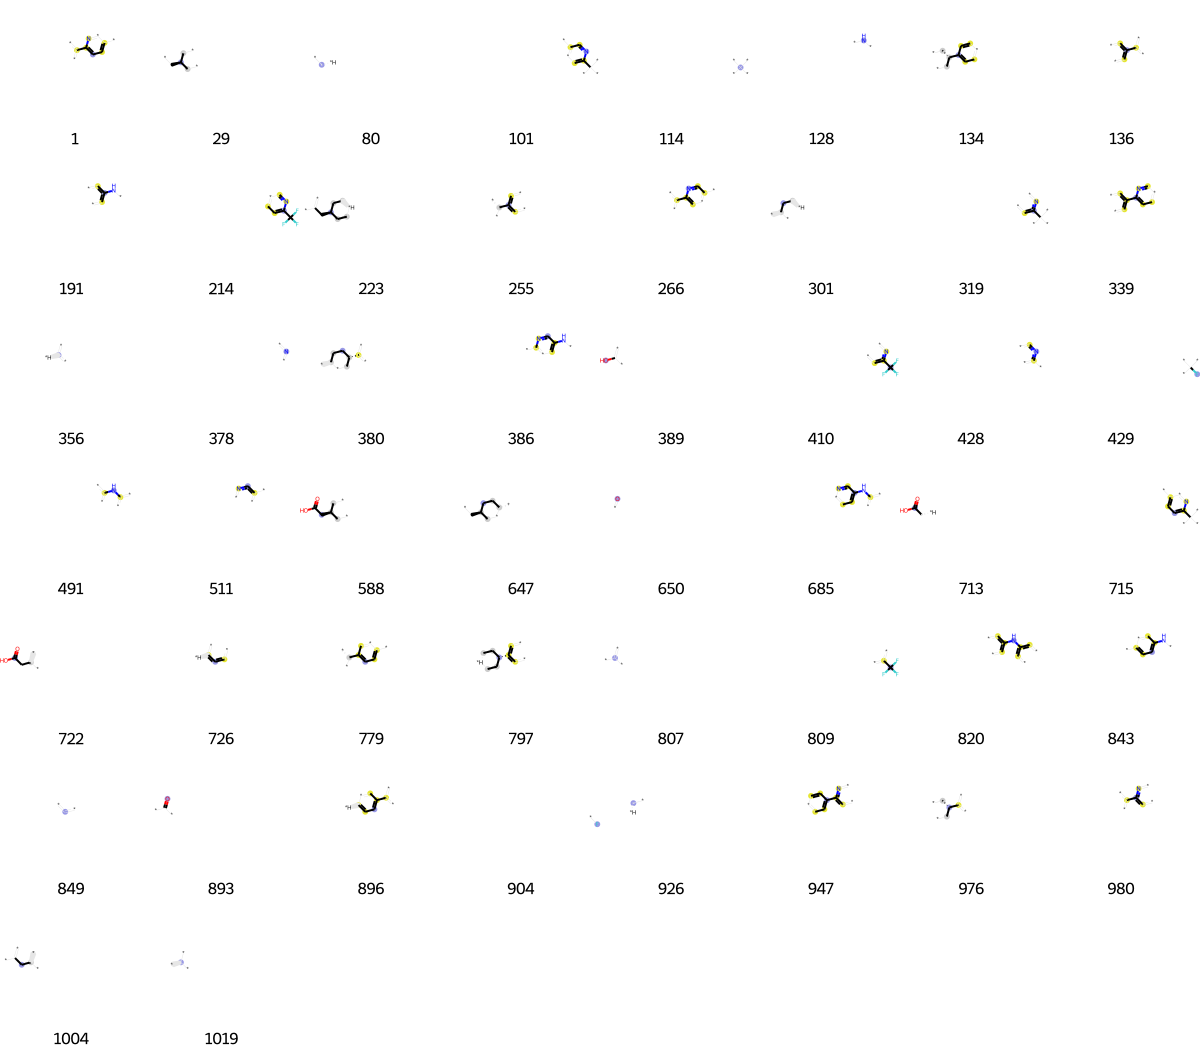

In [784]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [785]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[5,
 33,
 39,
 42,
 64,
 80,
 89,
 116,
 128,
 131,
 144,
 147,
 150,
 186,
 209,
 228,
 232,
 233,
 235,
 240,
 255,
 314,
 356,
 378,
 387,
 389,
 398,
 417,
 431,
 433,
 440,
 456,
 470,
 471,
 474,
 484,
 514,
 523,
 543,
 547,
 552,
 621,
 650,
 653,
 656,
 675,
 695,
 698,
 725,
 726,
 730,
 753,
 762,
 787,
 792,
 804,
 807,
 831,
 841,
 849,
 855,
 859,
 869,
 871,
 872,
 882,
 893,
 898,
 902,
 926,
 935,
 936,
 963,
 997,
 998,
 1019]

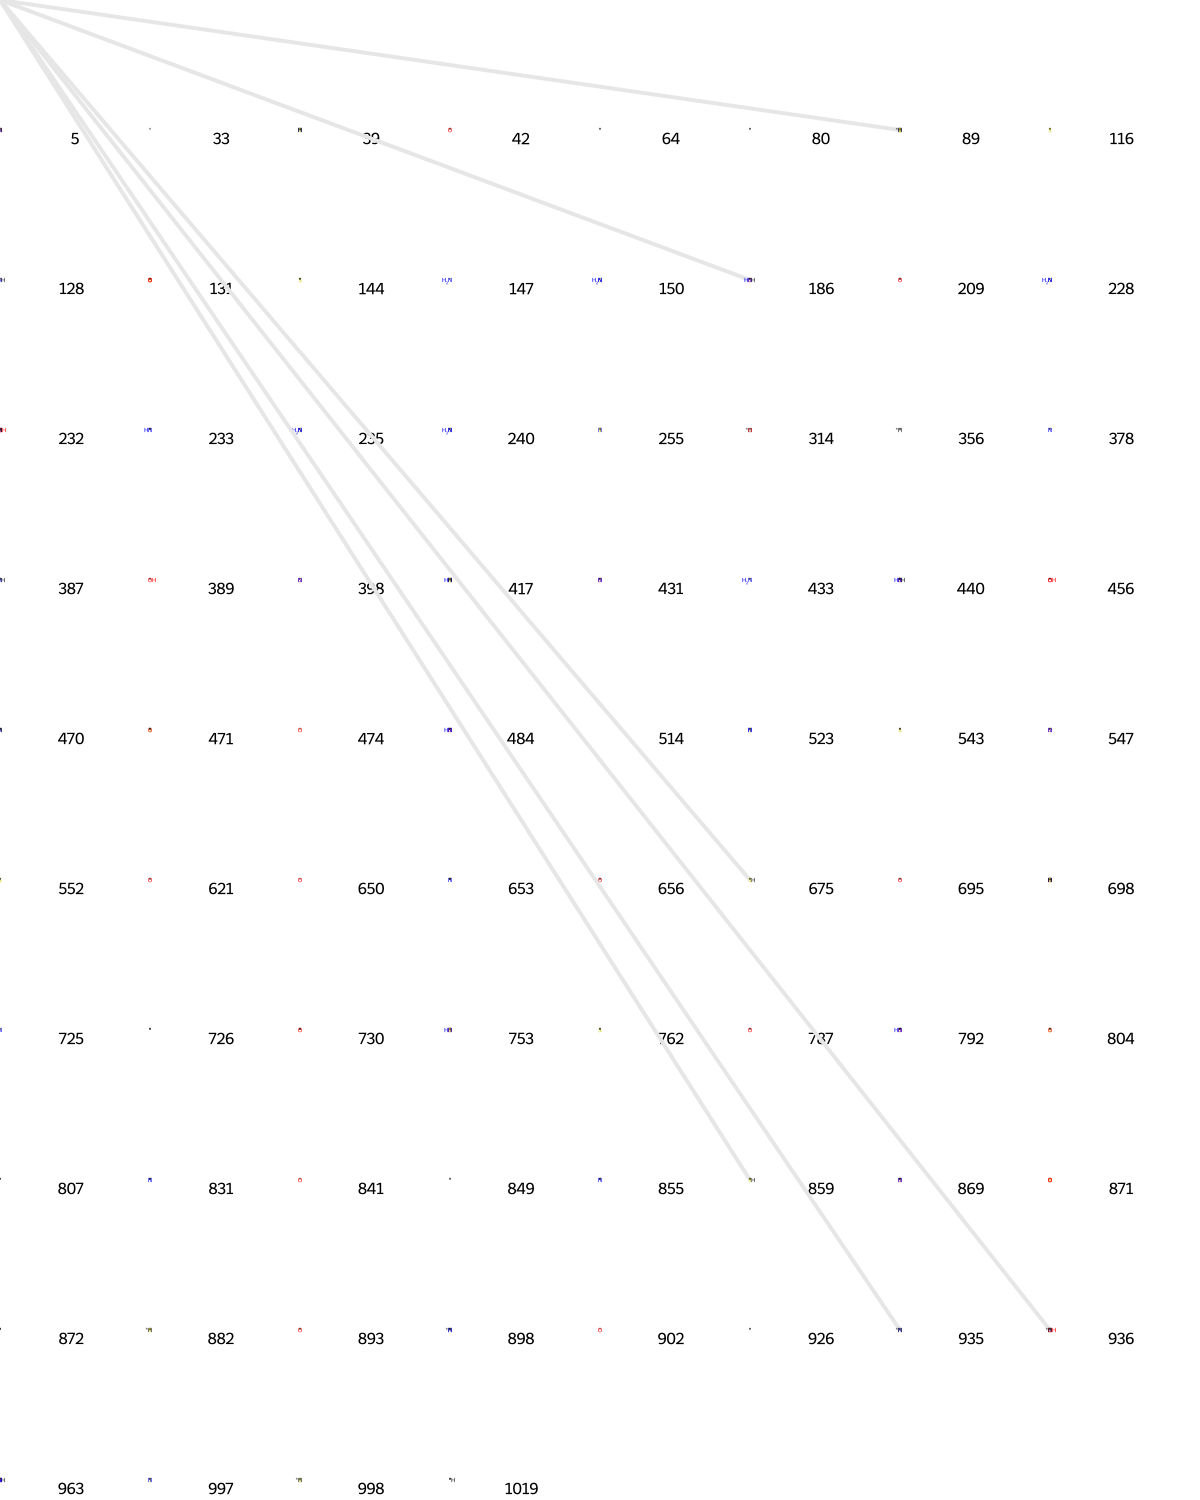

In [786]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [787]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[33,
 42,
 45,
 48,
 64,
 80,
 96,
 114,
 130,
 158,
 160,
 175,
 183,
 261,
 282,
 284,
 333,
 334,
 356,
 378,
 389,
 392,
 448,
 549,
 650,
 659,
 695,
 700,
 726,
 730,
 741,
 745,
 807,
 849,
 850,
 873,
 885,
 893,
 932,
 935,
 953]

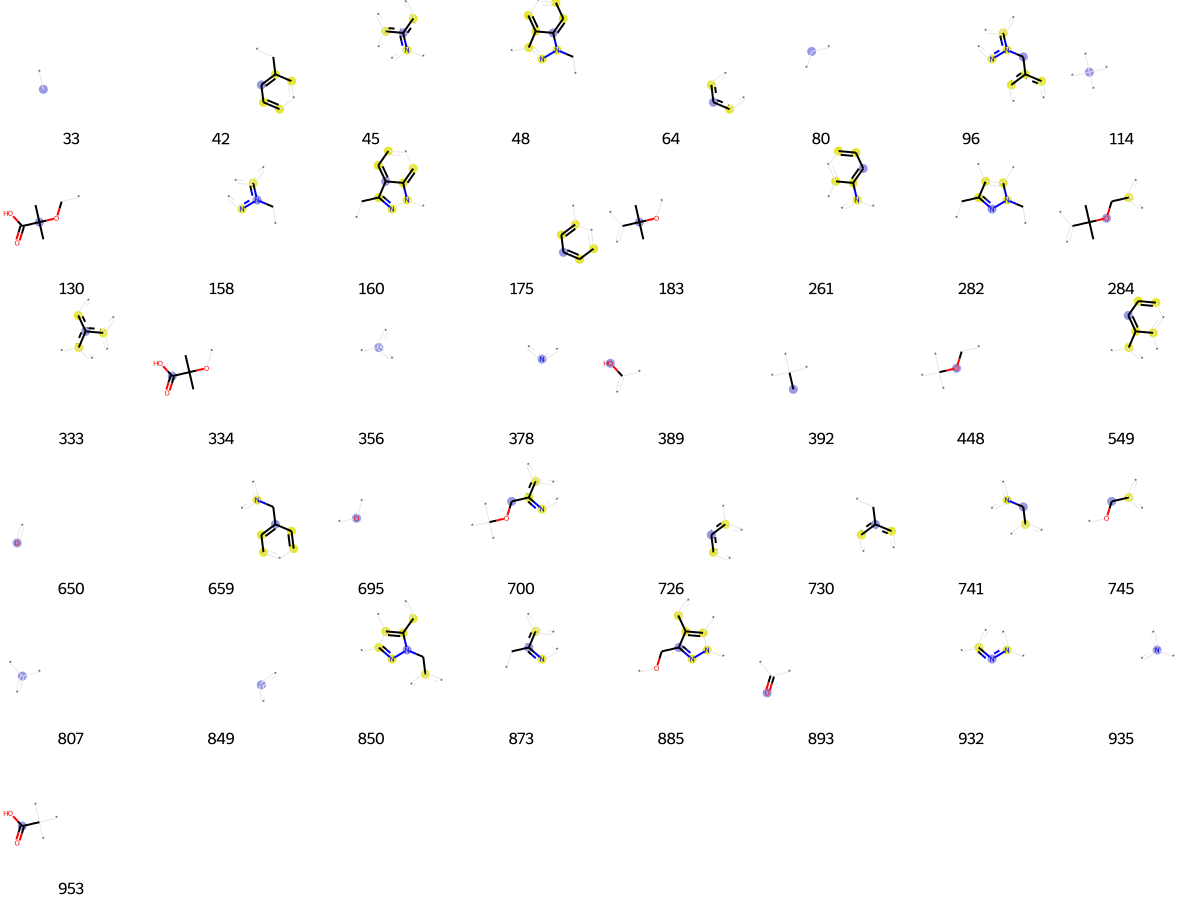

In [788]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [789]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[13,
 33,
 73,
 90,
 116,
 147,
 182,
 184,
 314,
 334,
 356,
 367,
 373,
 374,
 378,
 383,
 433,
 508,
 514,
 533,
 536,
 552,
 579,
 650,
 667,
 692,
 697,
 698,
 721,
 726,
 750,
 778,
 811,
 831,
 842,
 849,
 960,
 961,
 992]

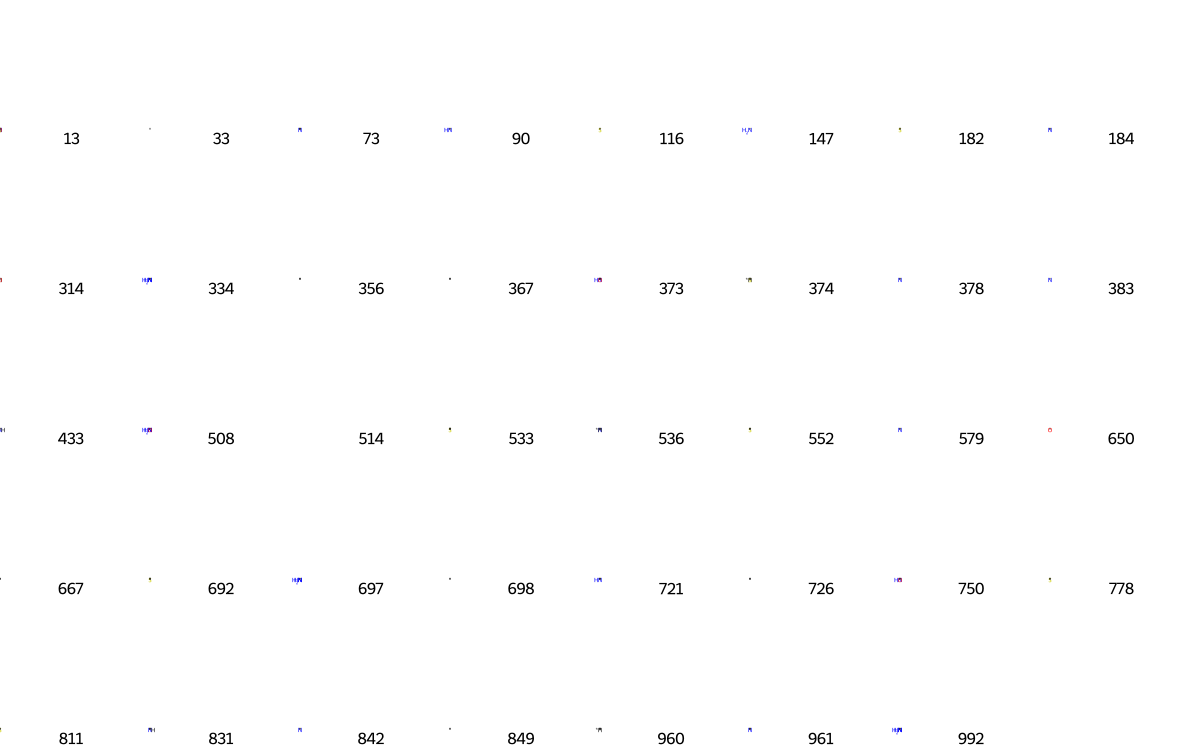

In [790]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [791]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[3,
 7,
 10,
 28,
 33,
 36,
 38,
 59,
 64,
 80,
 90,
 114,
 128,
 142,
 166,
 175,
 197,
 273,
 292,
 314,
 320,
 326,
 348,
 352,
 356,
 371,
 387,
 392,
 396,
 429,
 446,
 472,
 585,
 650,
 651,
 660,
 726,
 807,
 849,
 856,
 867,
 886,
 893,
 904,
 958,
 984,
 1001,
 1009,
 1019]

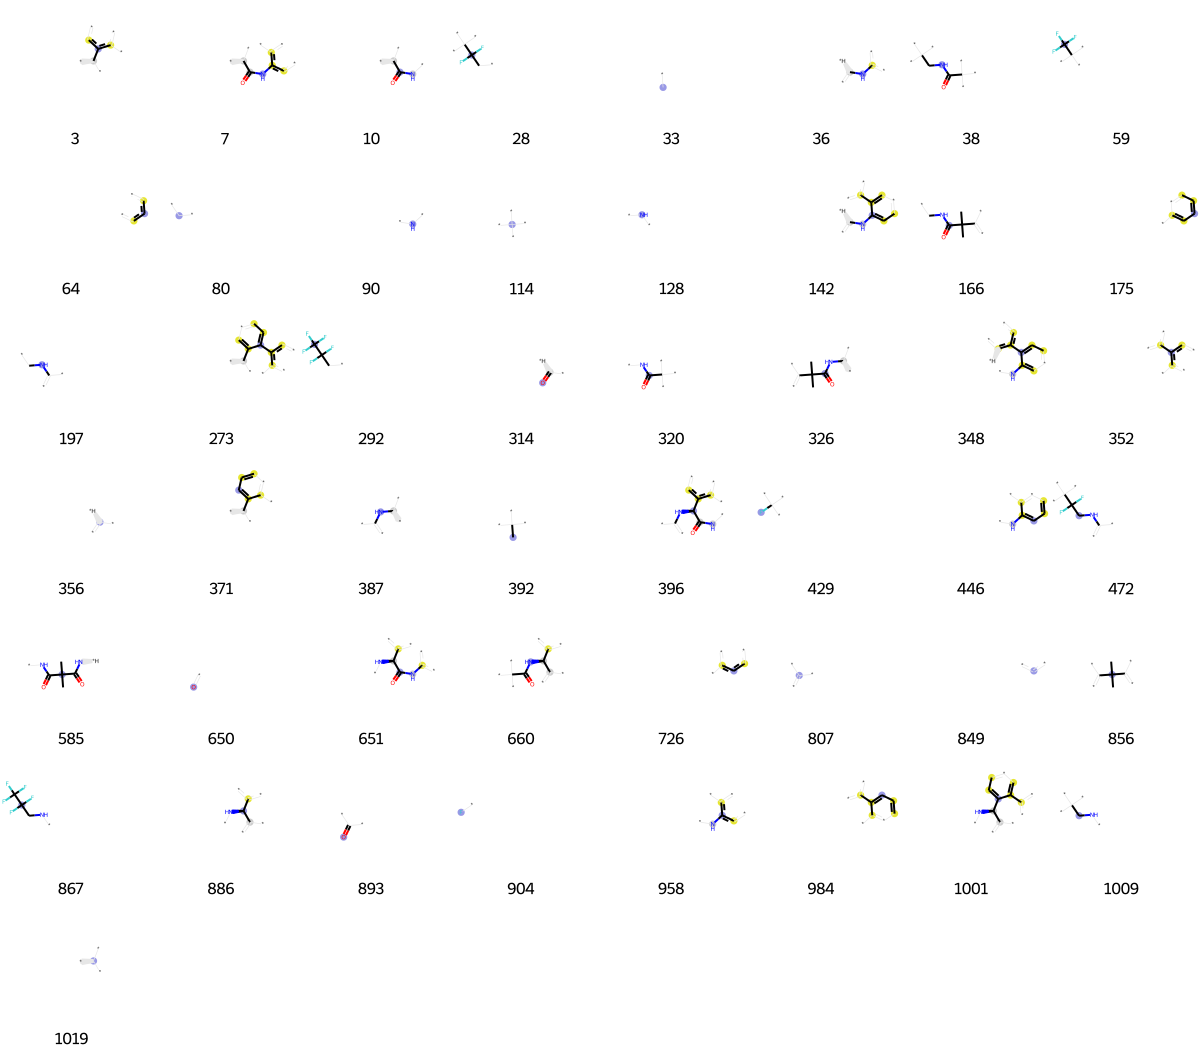

In [792]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [793]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 5,
 33,
 80,
 116,
 118,
 128,
 141,
 158,
 193,
 208,
 227,
 231,
 271,
 283,
 291,
 314,
 341,
 356,
 376,
 378,
 389,
 430,
 456,
 470,
 540,
 623,
 650,
 665,
 667,
 687,
 694,
 697,
 703,
 720,
 760,
 807,
 810,
 885,
 893,
 898,
 926,
 935,
 936,
 976,
 1011,
 1019]

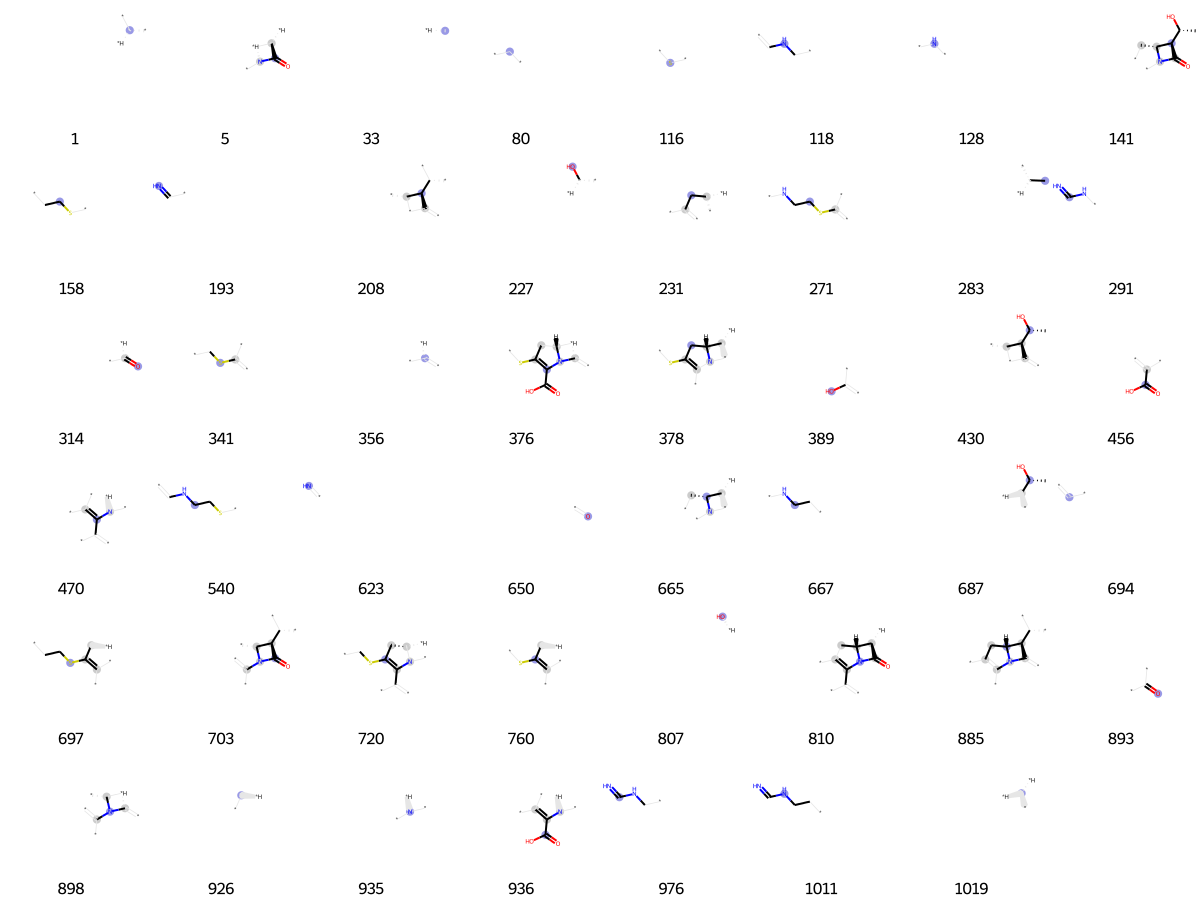

In [794]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [795]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 15,
 33,
 64,
 69,
 104,
 128,
 130,
 165,
 184,
 191,
 216,
 283,
 330,
 356,
 561,
 585,
 592,
 650,
 659,
 695,
 703,
 726,
 734,
 792,
 807,
 849,
 875,
 893,
 954,
 972]

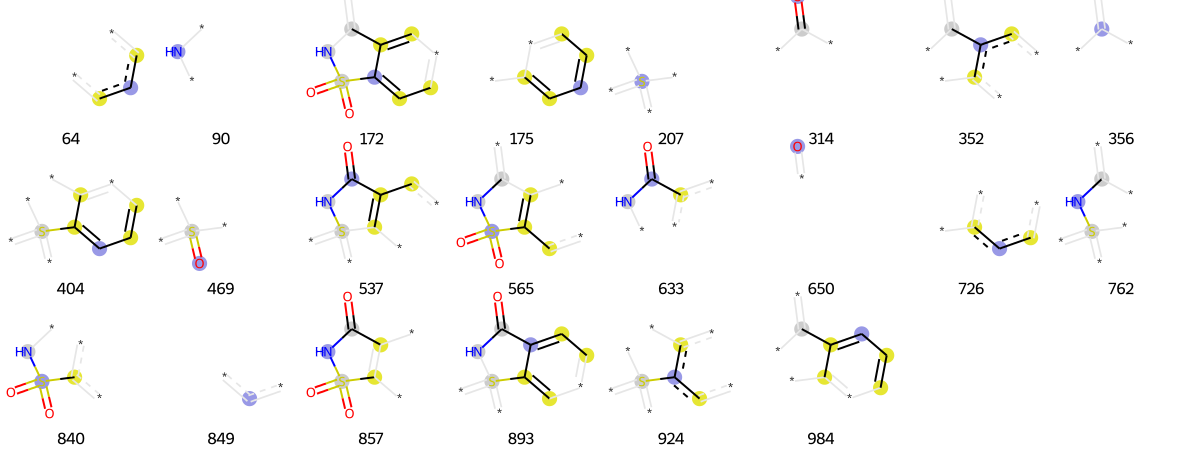

In [796]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [797]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 47,
 49,
 114,
 157,
 210,
 286,
 315,
 319,
 343,
 350,
 356,
 360,
 392,
 393,
 452,
 532,
 559,
 641,
 650,
 674,
 682,
 694,
 715,
 726,
 774,
 790,
 849]

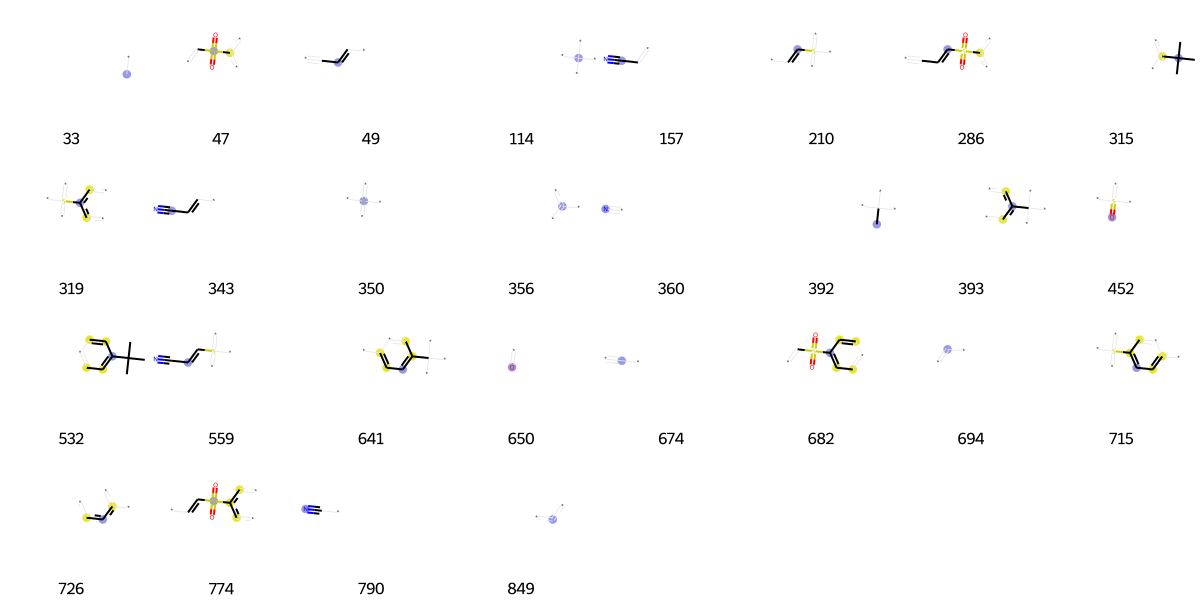

In [798]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [799]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[15,
 33,
 64,
 90,
 314,
 333,
 356,
 376,
 378,
 382,
 394,
 397,
 507,
 549,
 578,
 583,
 650,
 698,
 700,
 721,
 726,
 750,
 807,
 811,
 831,
 838,
 849,
 1002]

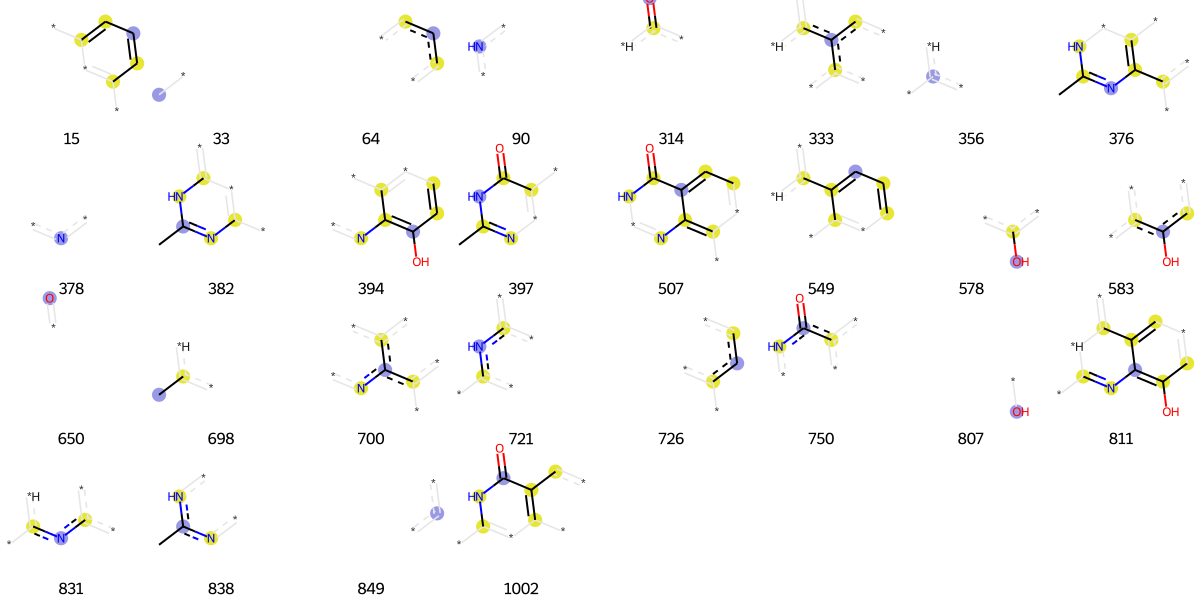

In [800]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [801]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[9,
 33,
 43,
 53,
 64,
 73,
 80,
 90,
 128,
 237,
 285,
 295,
 301,
 314,
 333,
 339,
 356,
 378,
 381,
 428,
 448,
 455,
 467,
 480,
 502,
 511,
 523,
 542,
 584,
 590,
 650,
 656,
 659,
 672,
 716,
 721,
 739,
 741,
 750,
 753,
 757,
 767,
 804,
 831,
 835,
 838,
 842,
 849,
 883,
 886,
 914,
 926,
 934,
 935,
 950,
 1002,
 1019]

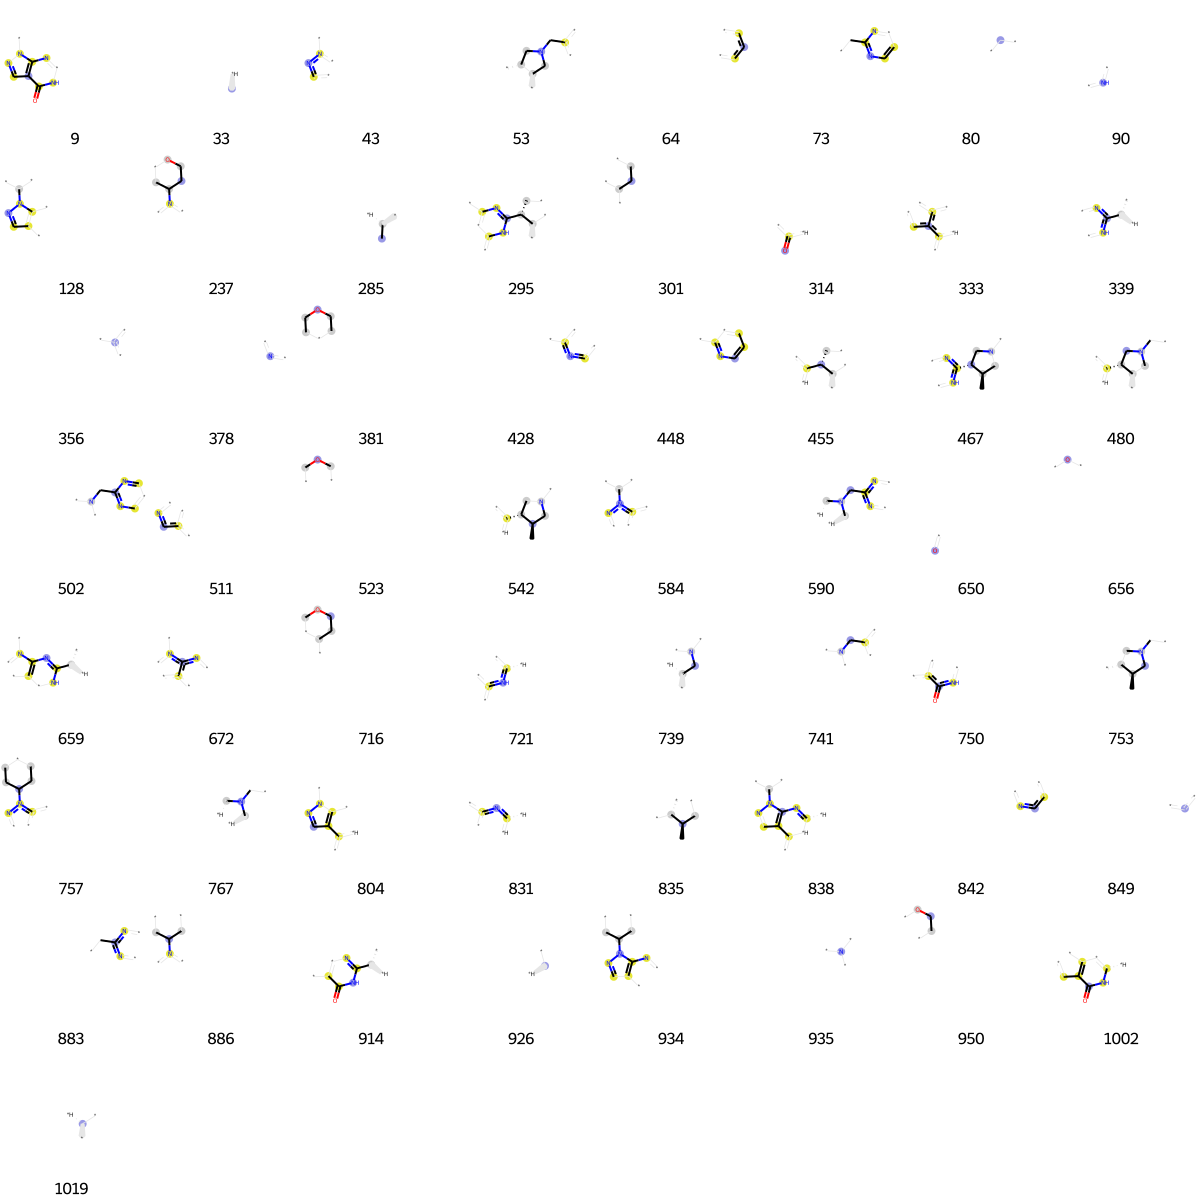

In [802]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [803]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[4,
 7,
 15,
 31,
 33,
 64,
 80,
 118,
 181,
 235,
 302,
 308,
 356,
 361,
 378,
 389,
 398,
 406,
 425,
 456,
 471,
 479,
 483,
 504,
 508,
 525,
 545,
 650,
 673,
 694,
 698,
 726,
 767,
 799,
 807,
 831,
 835,
 849,
 855,
 893,
 896,
 926,
 935,
 970,
 974,
 976,
 977]

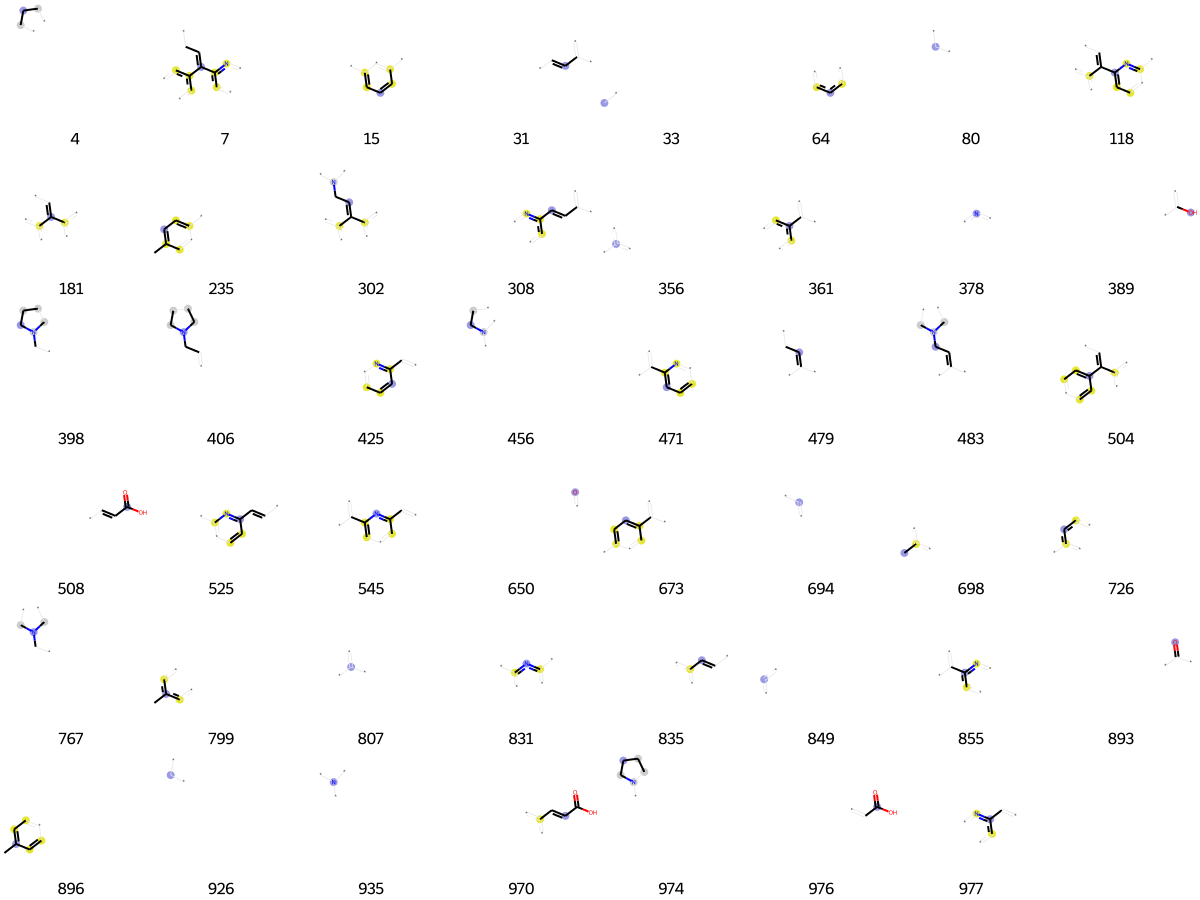

In [804]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [805]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 33,
 74,
 75,
 80,
 90,
 121,
 128,
 197,
 207,
 216,
 218,
 294,
 341,
 356,
 386,
 389,
 444,
 456,
 458,
 514,
 548,
 565,
 600,
 646,
 650,
 653,
 699,
 702,
 726,
 739,
 767,
 807,
 829,
 849,
 887,
 890,
 893,
 904,
 926,
 935,
 985]

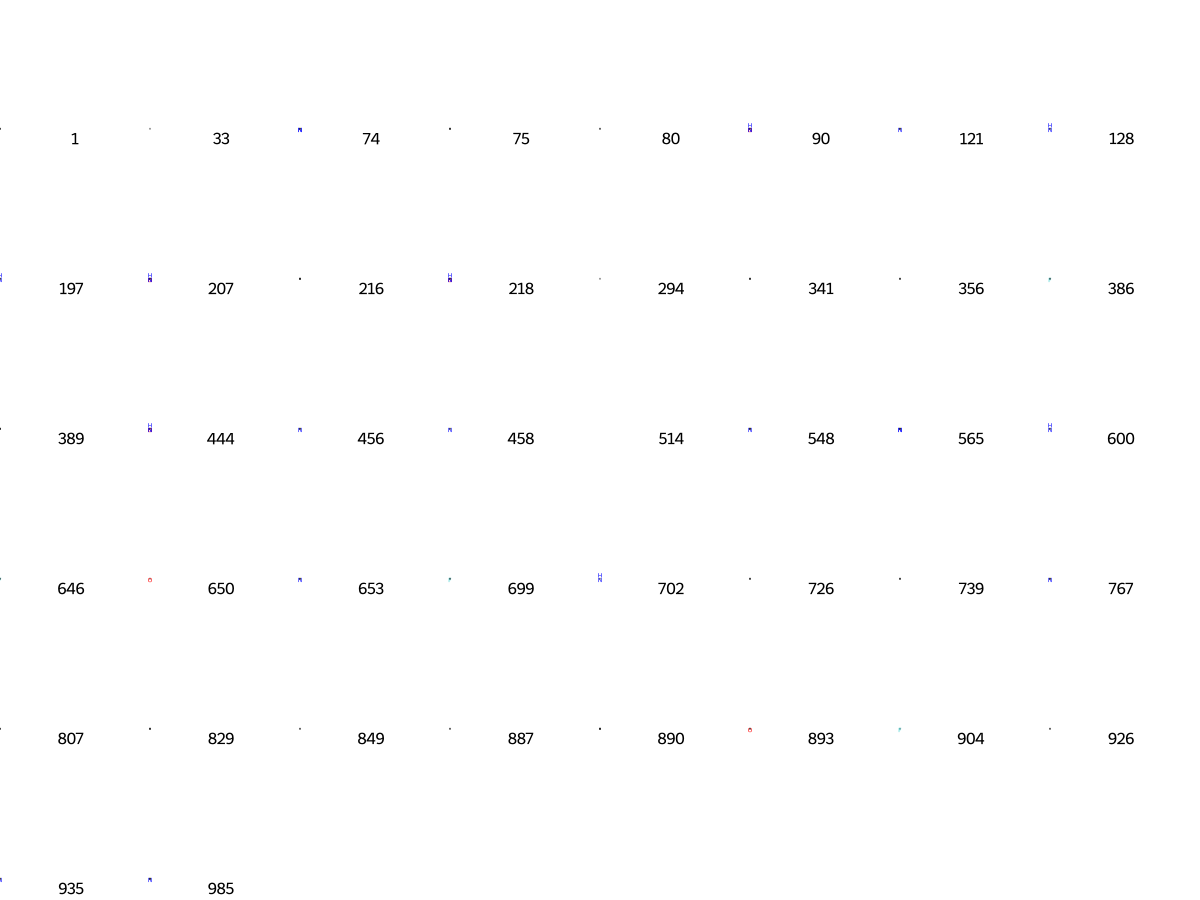

In [806]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [807]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 17,
 64,
 134,
 175,
 233,
 255,
 301,
 356,
 364,
 389,
 456,
 514,
 524,
 581,
 593,
 639,
 665,
 726,
 797,
 802,
 807,
 830,
 849,
 890,
 926,
 935,
 976,
 1019]

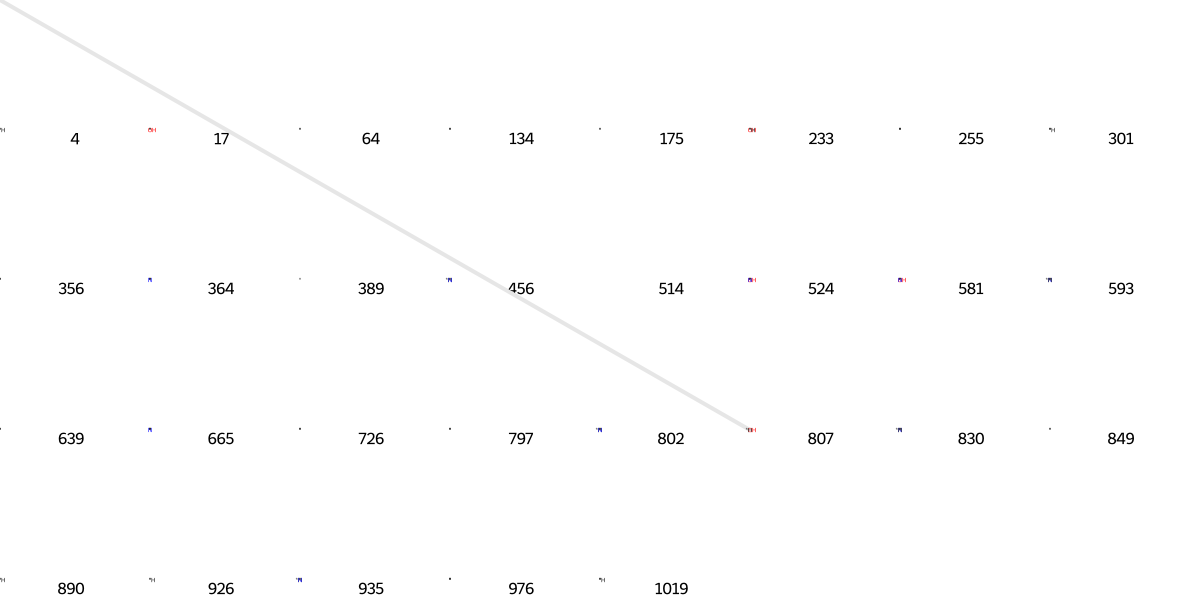

In [808]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [809]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 26,
 33,
 39,
 72,
 77,
 80,
 94,
 114,
 117,
 119,
 142,
 145,
 203,
 214,
 226,
 268,
 283,
 299,
 301,
 333,
 338,
 341,
 356,
 389,
 407,
 429,
 482,
 484,
 524,
 572,
 650,
 653,
 695,
 726,
 732,
 807,
 809,
 827,
 829,
 831,
 849,
 854,
 875,
 886,
 889,
 893,
 904,
 917,
 926,
 935,
 945,
 946,
 958,
 974,
 1019]

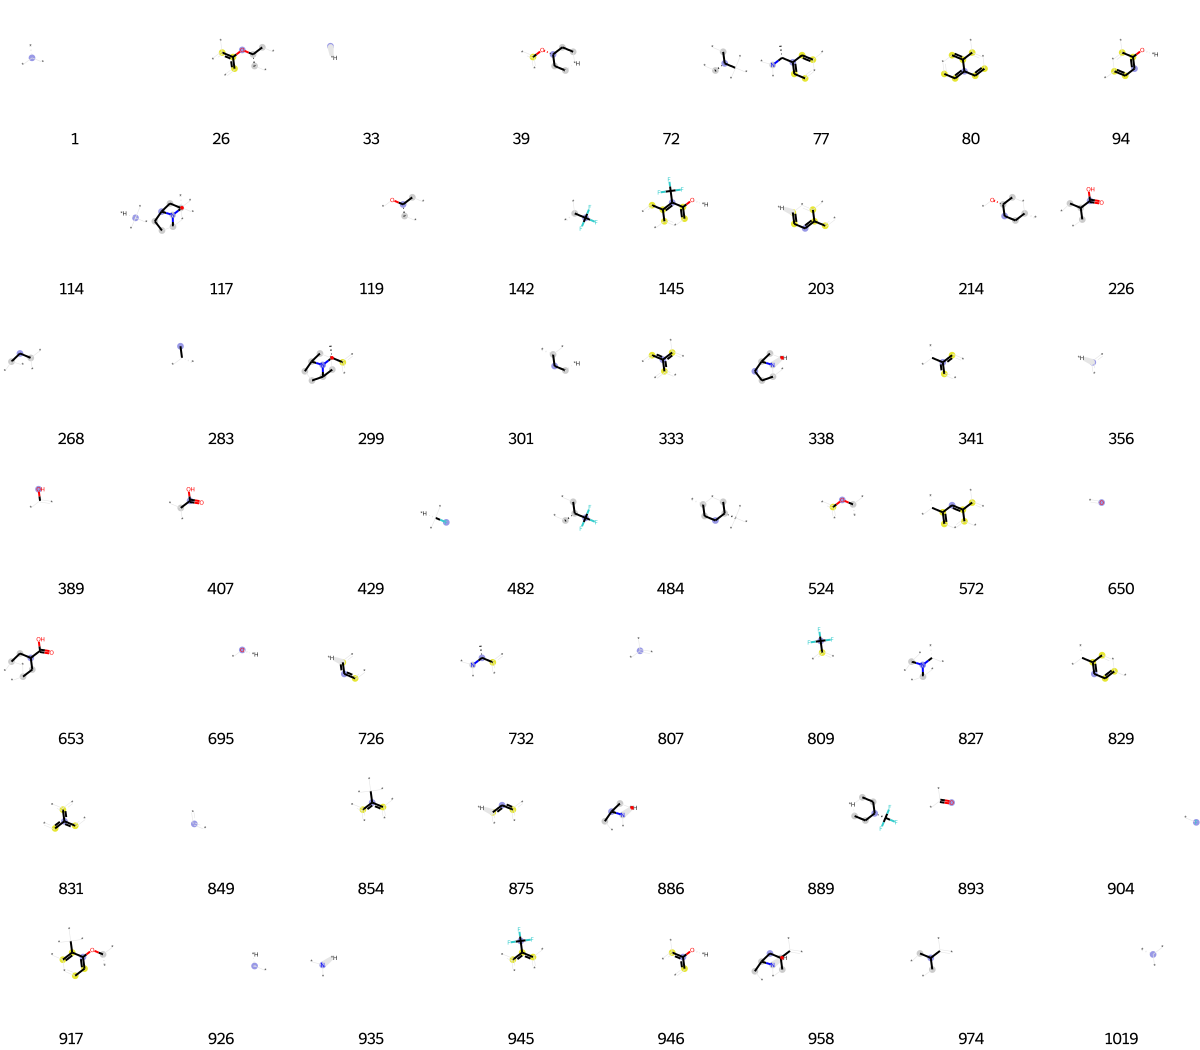

In [810]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [811]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 36,
 51,
 80,
 90,
 100,
 121,
 143,
 149,
 268,
 294,
 314,
 356,
 360,
 361,
 378,
 422,
 455,
 504,
 528,
 537,
 562,
 650,
 675,
 679,
 698,
 700,
 721,
 732,
 771,
 774,
 779,
 787,
 794,
 802,
 820,
 831,
 860,
 880,
 890,
 926,
 935,
 952,
 1019]

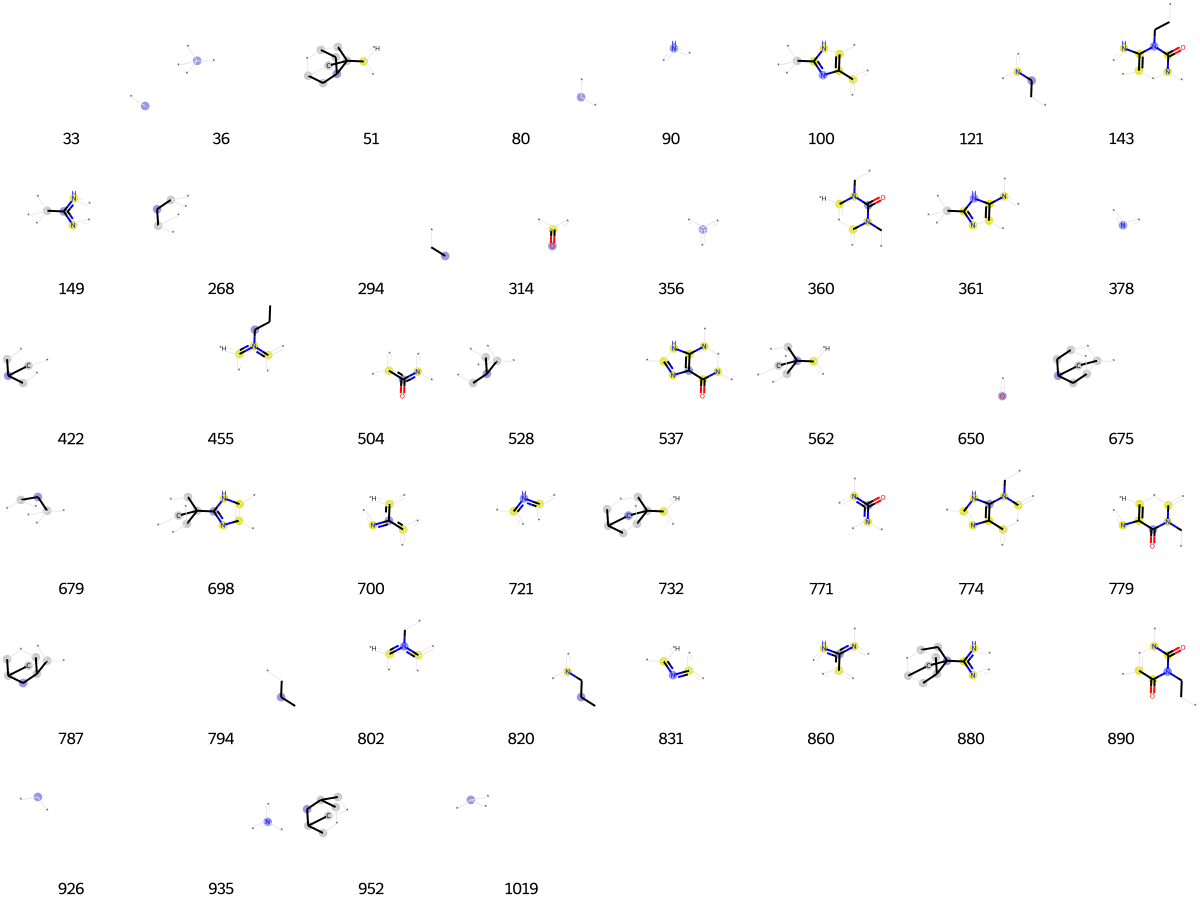

In [812]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [813]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[5,
 46,
 80,
 157,
 216,
 280,
 290,
 301,
 310,
 314,
 356,
 378,
 395,
 408,
 425,
 432,
 433,
 437,
 456,
 458,
 474,
 540,
 561,
 640,
 650,
 659,
 675,
 726,
 730,
 789,
 816,
 849,
 890,
 892,
 893,
 926,
 927,
 935,
 1019]

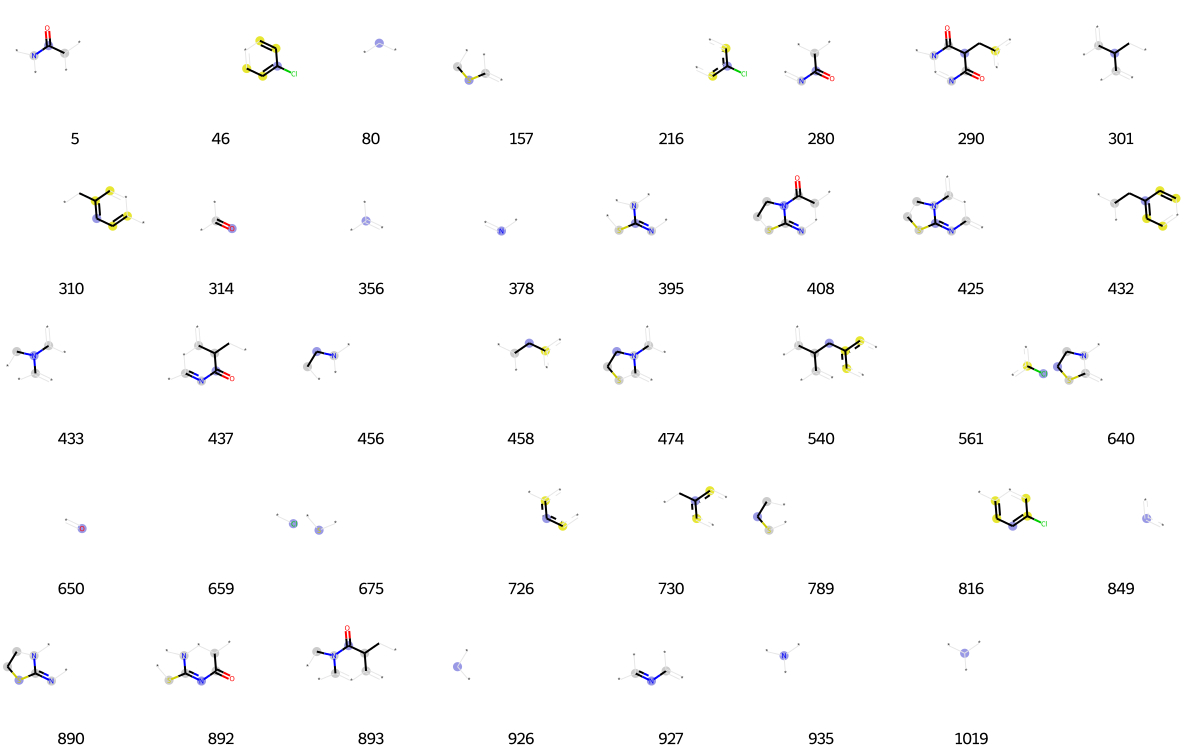

In [814]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [815]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[14,
 33,
 34,
 36,
 47,
 53,
 56,
 59,
 75,
 80,
 88,
 114,
 119,
 128,
 157,
 179,
 191,
 196,
 248,
 250,
 285,
 294,
 315,
 322,
 356,
 363,
 378,
 392,
 428,
 454,
 470,
 486,
 511,
 518,
 524,
 581,
 600,
 650,
 656,
 658,
 659,
 679,
 687,
 695,
 700,
 718,
 726,
 792,
 807,
 843,
 849,
 855,
 871,
 875,
 888,
 893,
 926,
 935,
 946,
 954,
 965,
 966,
 1019]

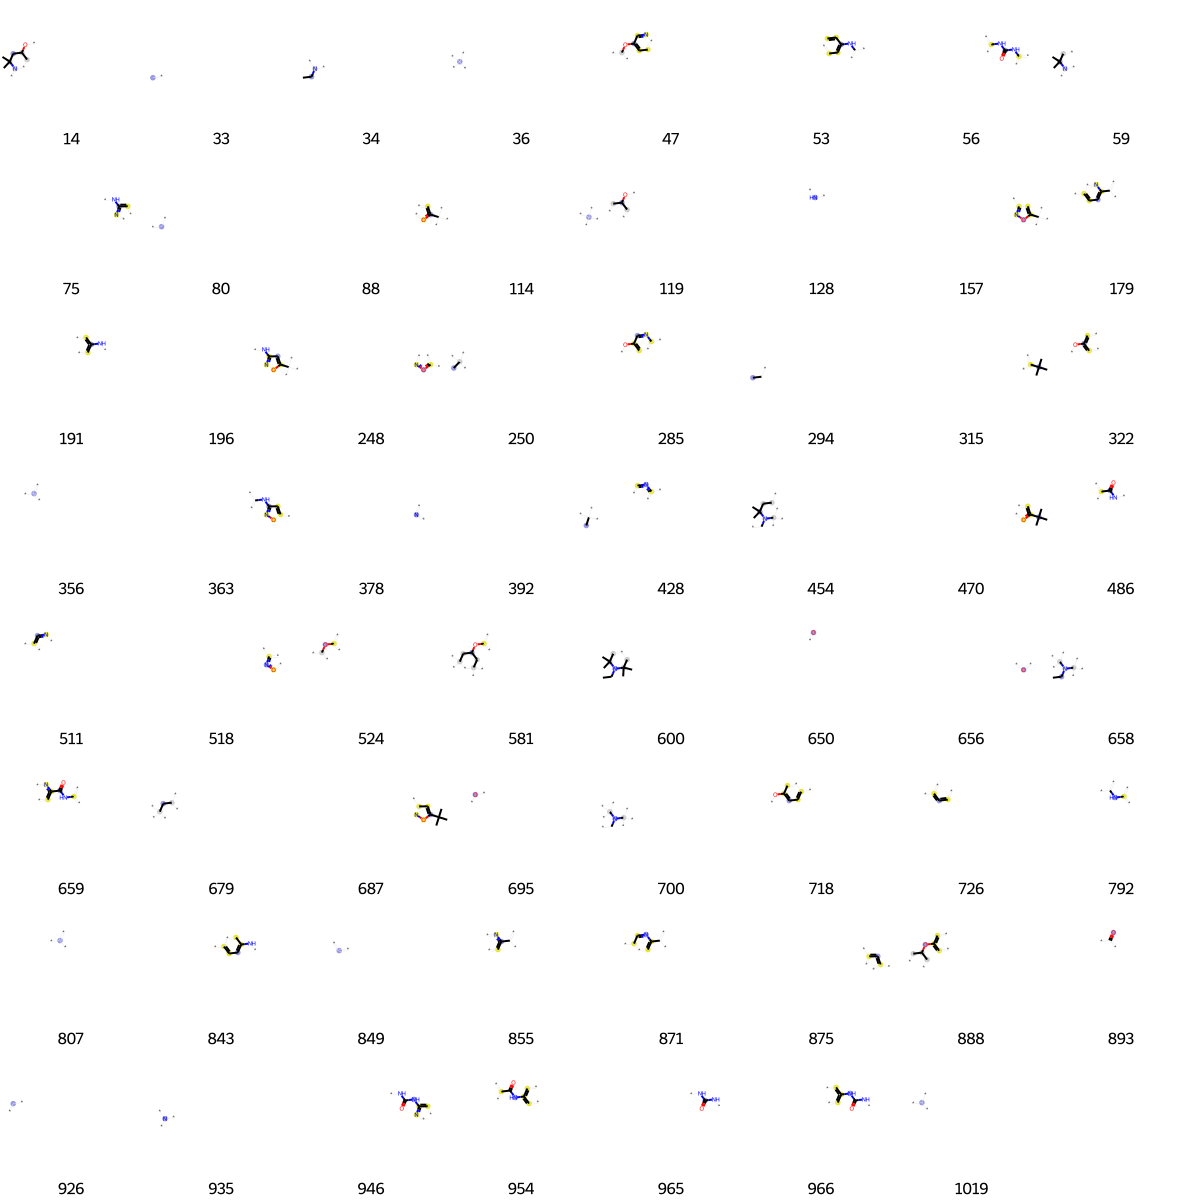

In [816]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [817]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 9,
 15,
 33,
 64,
 105,
 175,
 233,
 283,
 341,
 356,
 361,
 379,
 389,
 557,
 594,
 650,
 726,
 751,
 807,
 820,
 849,
 875,
 893,
 900,
 921,
 961,
 997]

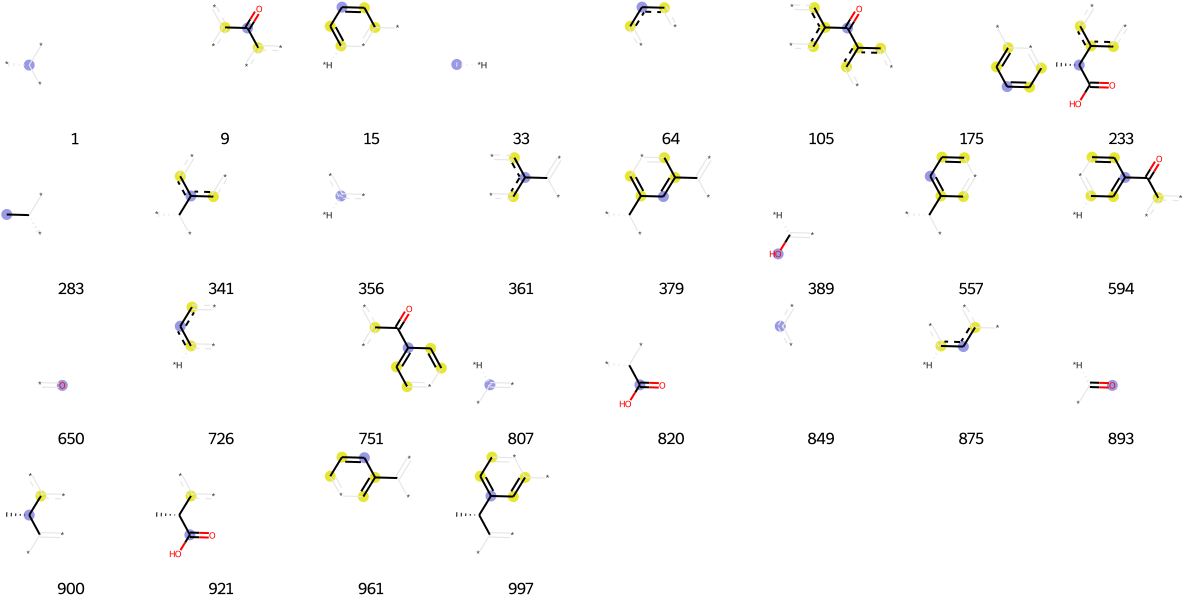

In [818]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])